# **Metrics and Results - SSCS - K-Fold**

Developed by André Paiva

Based on papers by Helena Cuesta and Emilia Gómez

In [1]:
import numpy as np
import va_plots

In [2]:
TRAIN = 2

In [3]:
def plot_val_metrics(train, fold):
    log_folder = 'mask_voas_v2'
    model_name = 'MaskVoasCNNv2'
    metrics_dir = './Evaluation_Data/val_' + log_folder + '_treino' + str(train) + '_kfold_' + str(fold) + '.h5'
    mix_metrics,sop_metrics, alto_metrics, ten_metrics, bass_metrics = va_plots.metrics_load_precomputed(metrics_dir)
    va_plots.evaluation_boxplots(sop_metrics,
                                alto_metrics,
                                ten_metrics,
                                bass_metrics,
                                title=model_name + ' (KFold) - Fold ' + str(fold) + ' - Validation Fold')

In [4]:
def plot_test_metrics(train, fold):
    log_folder = 'mask_voas_v2'
    model_name = 'MaskVoasCNNv2'
    metrics_dir = './Evaluation_Data/' + log_folder + '_treino' + str(train) + '_kfold_' + str(fold) + '.h5'
    mix_metrics,sop_metrics, alto_metrics, ten_metrics, bass_metrics = va_plots.metrics_load_precomputed(metrics_dir)
    va_plots.evaluation_boxplots(sop_metrics,
                                alto_metrics,
                                ten_metrics,
                                bass_metrics,
                                title=model_name + ' (KFold) - Fold ' + str(fold) + ' - Test')

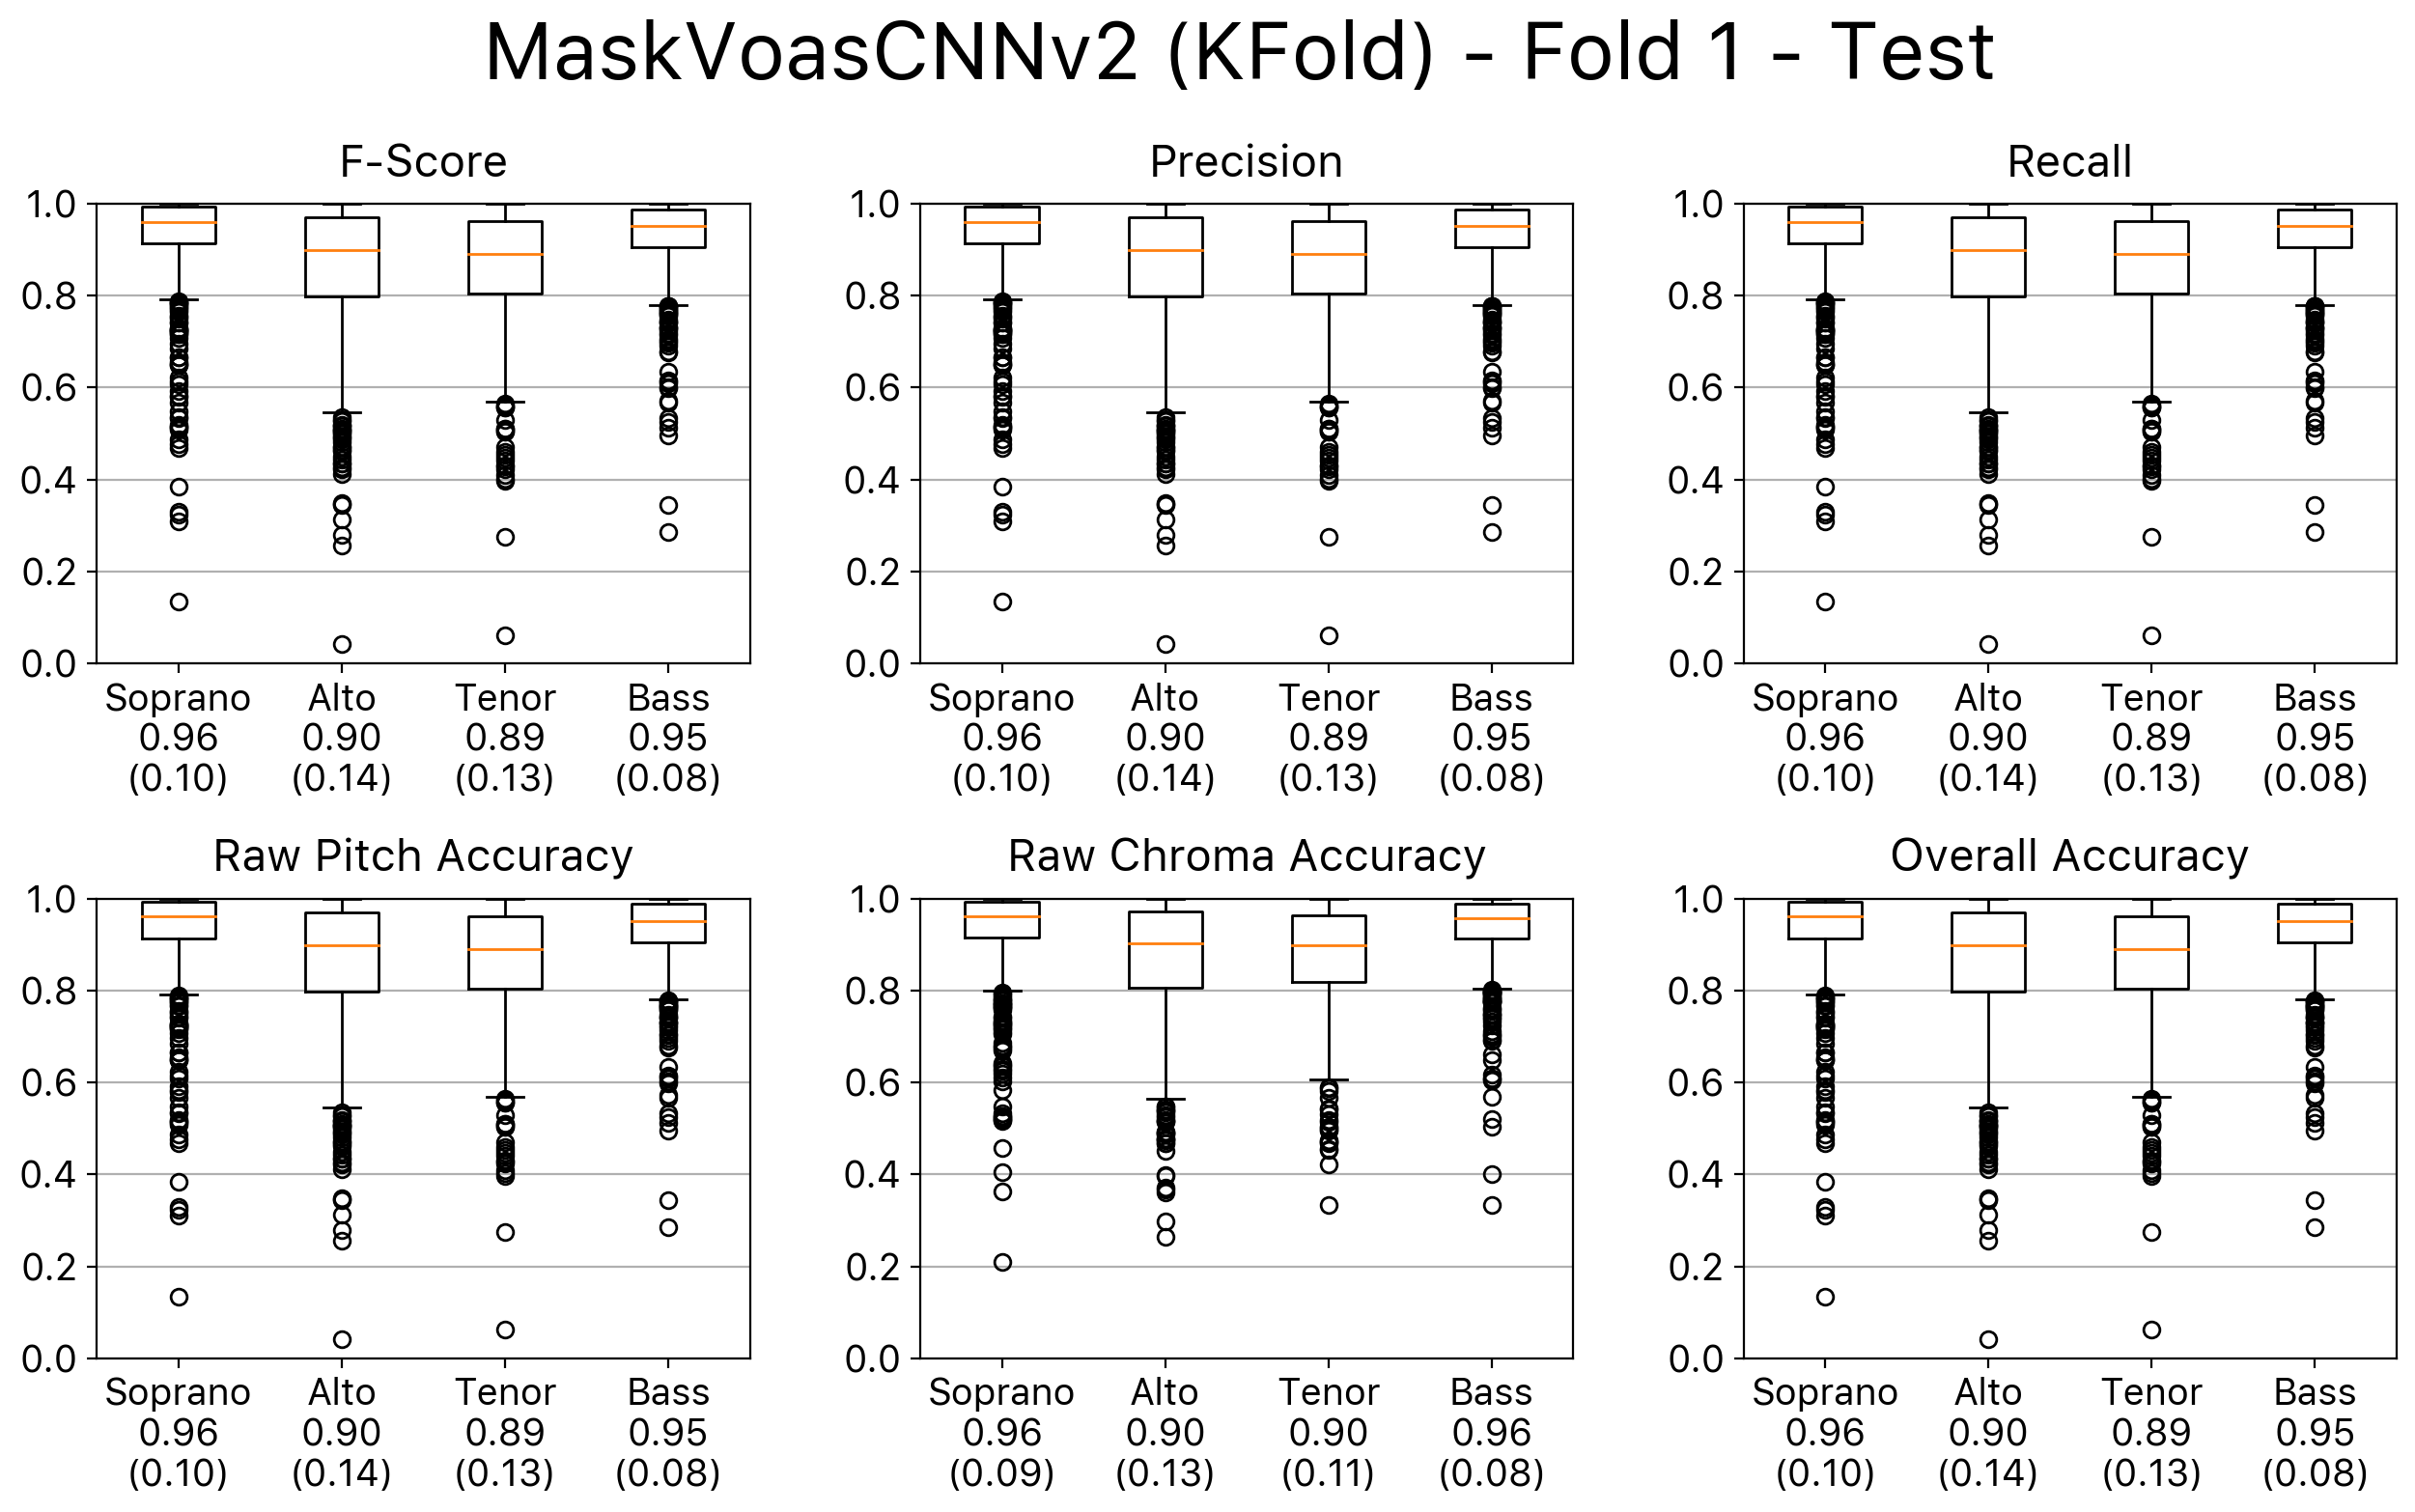

In [5]:
plot_test_metrics(TRAIN, 1)

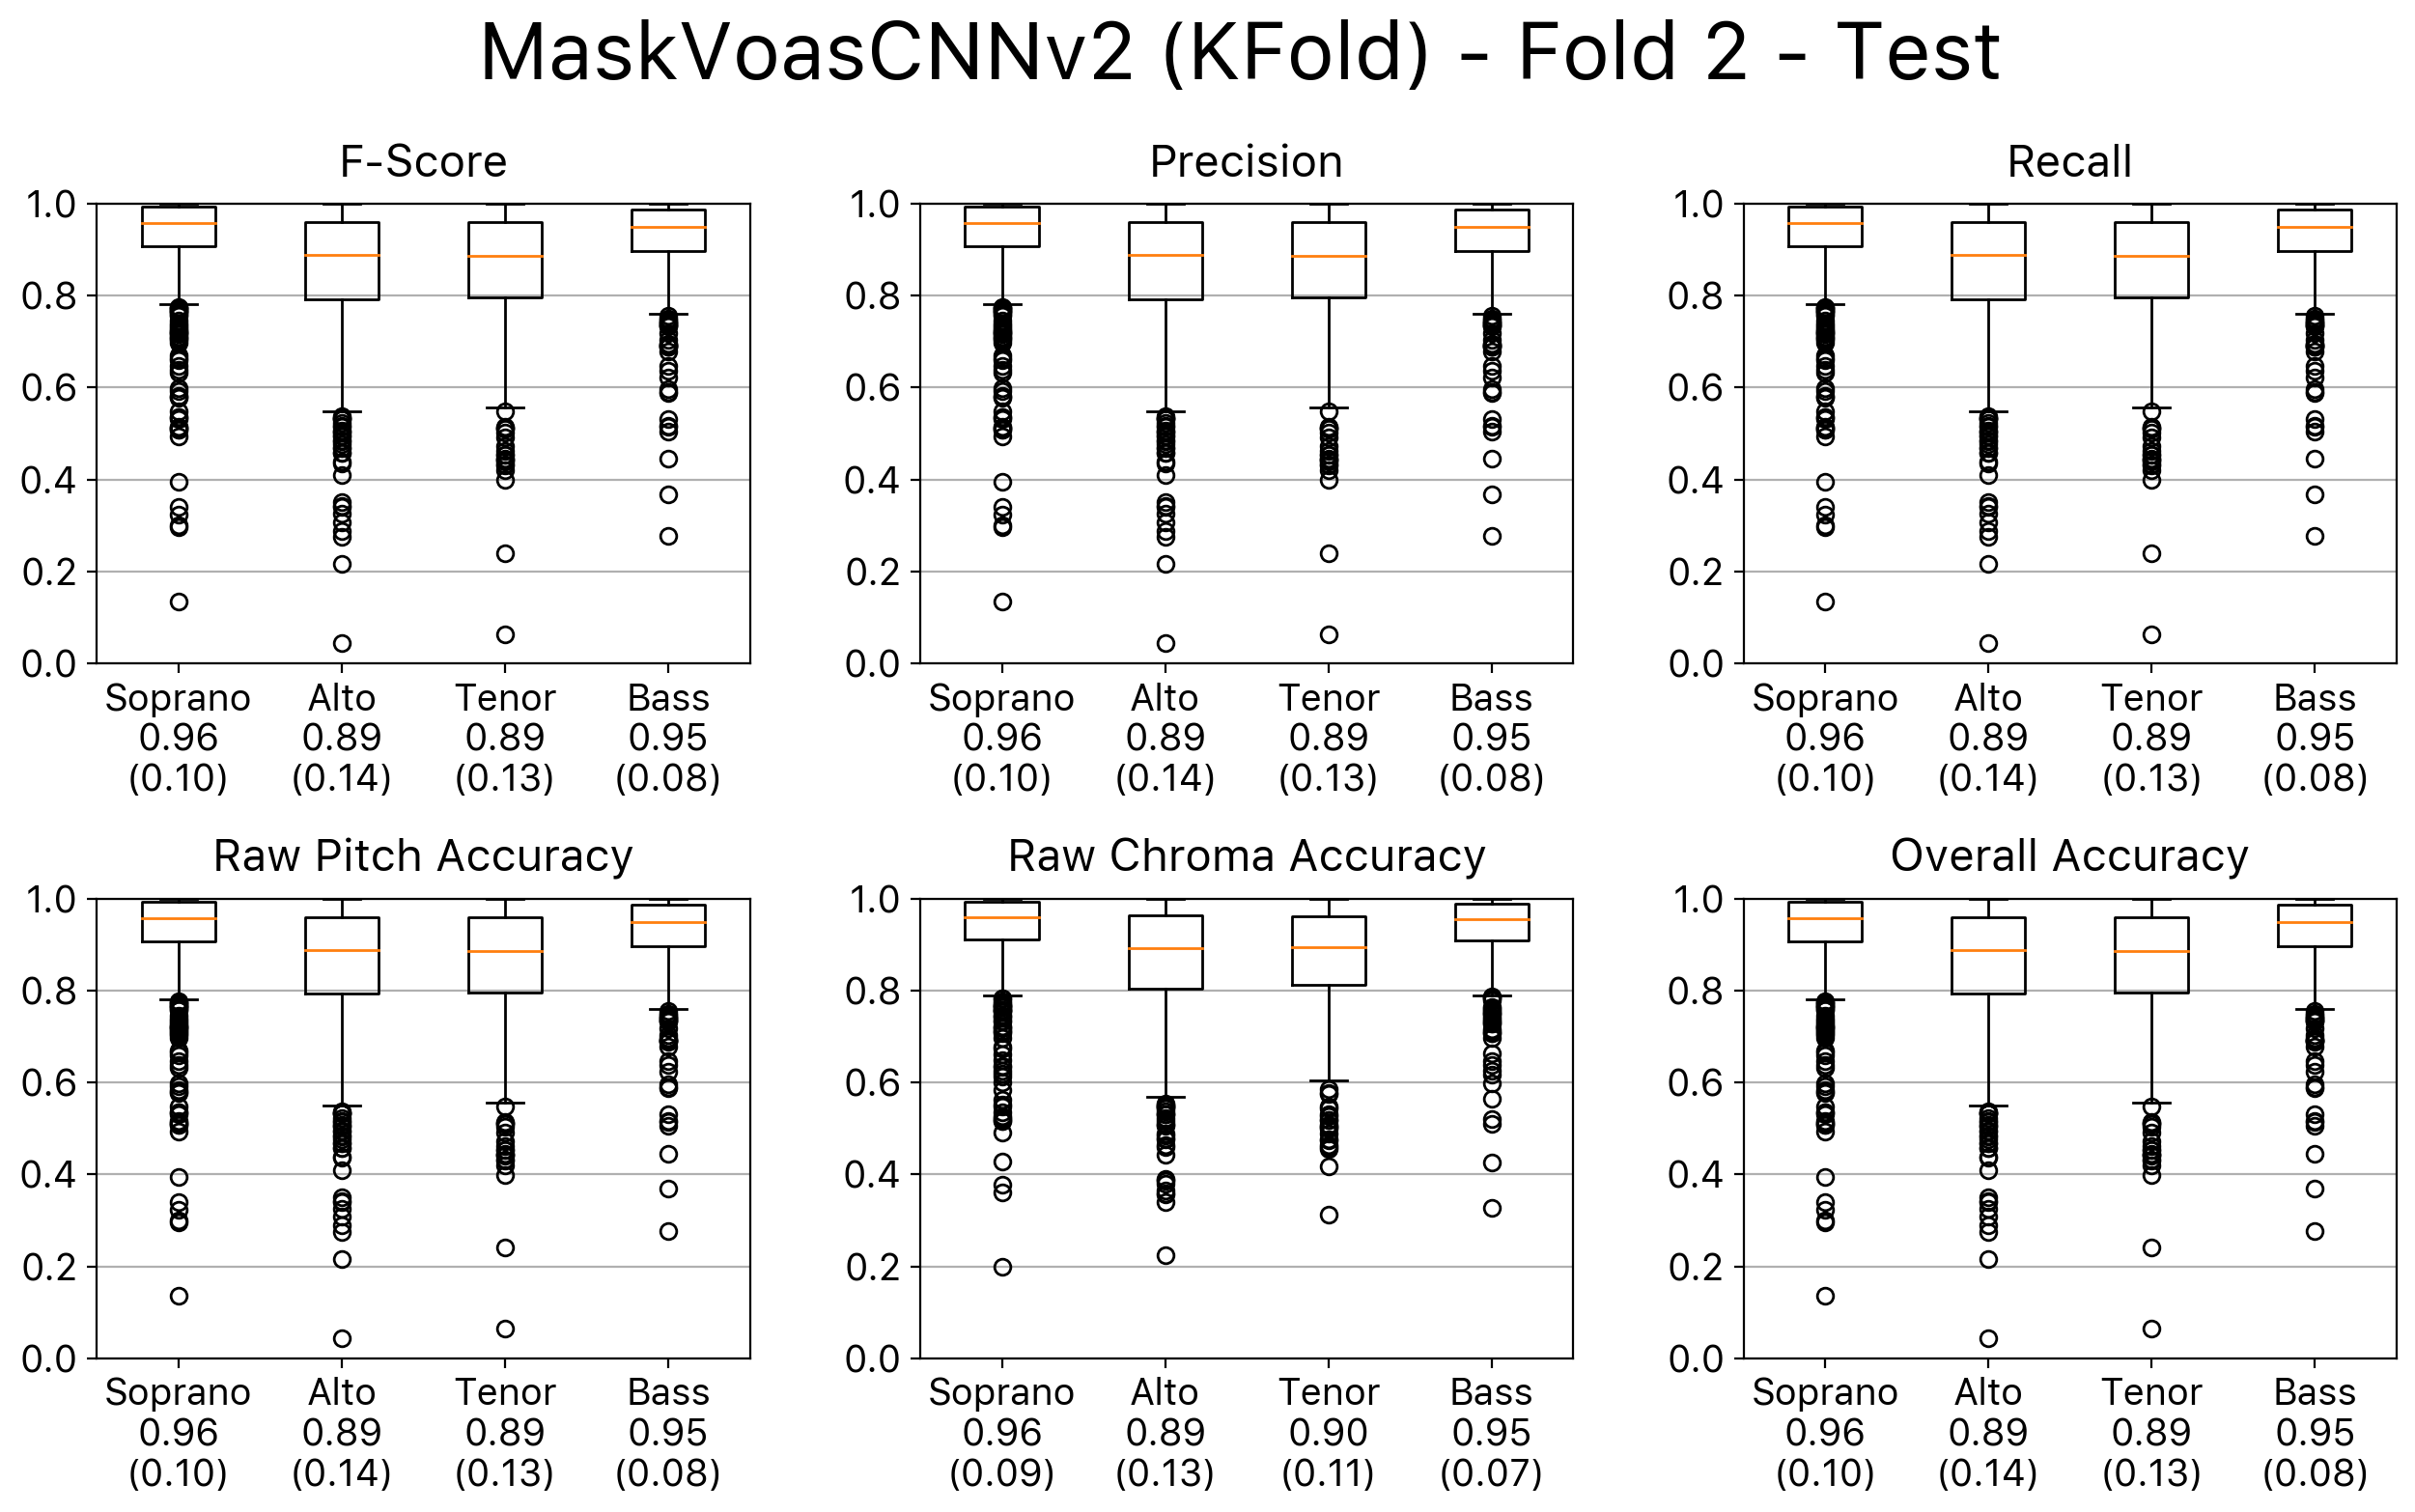

In [6]:
plot_test_metrics(TRAIN, 2)

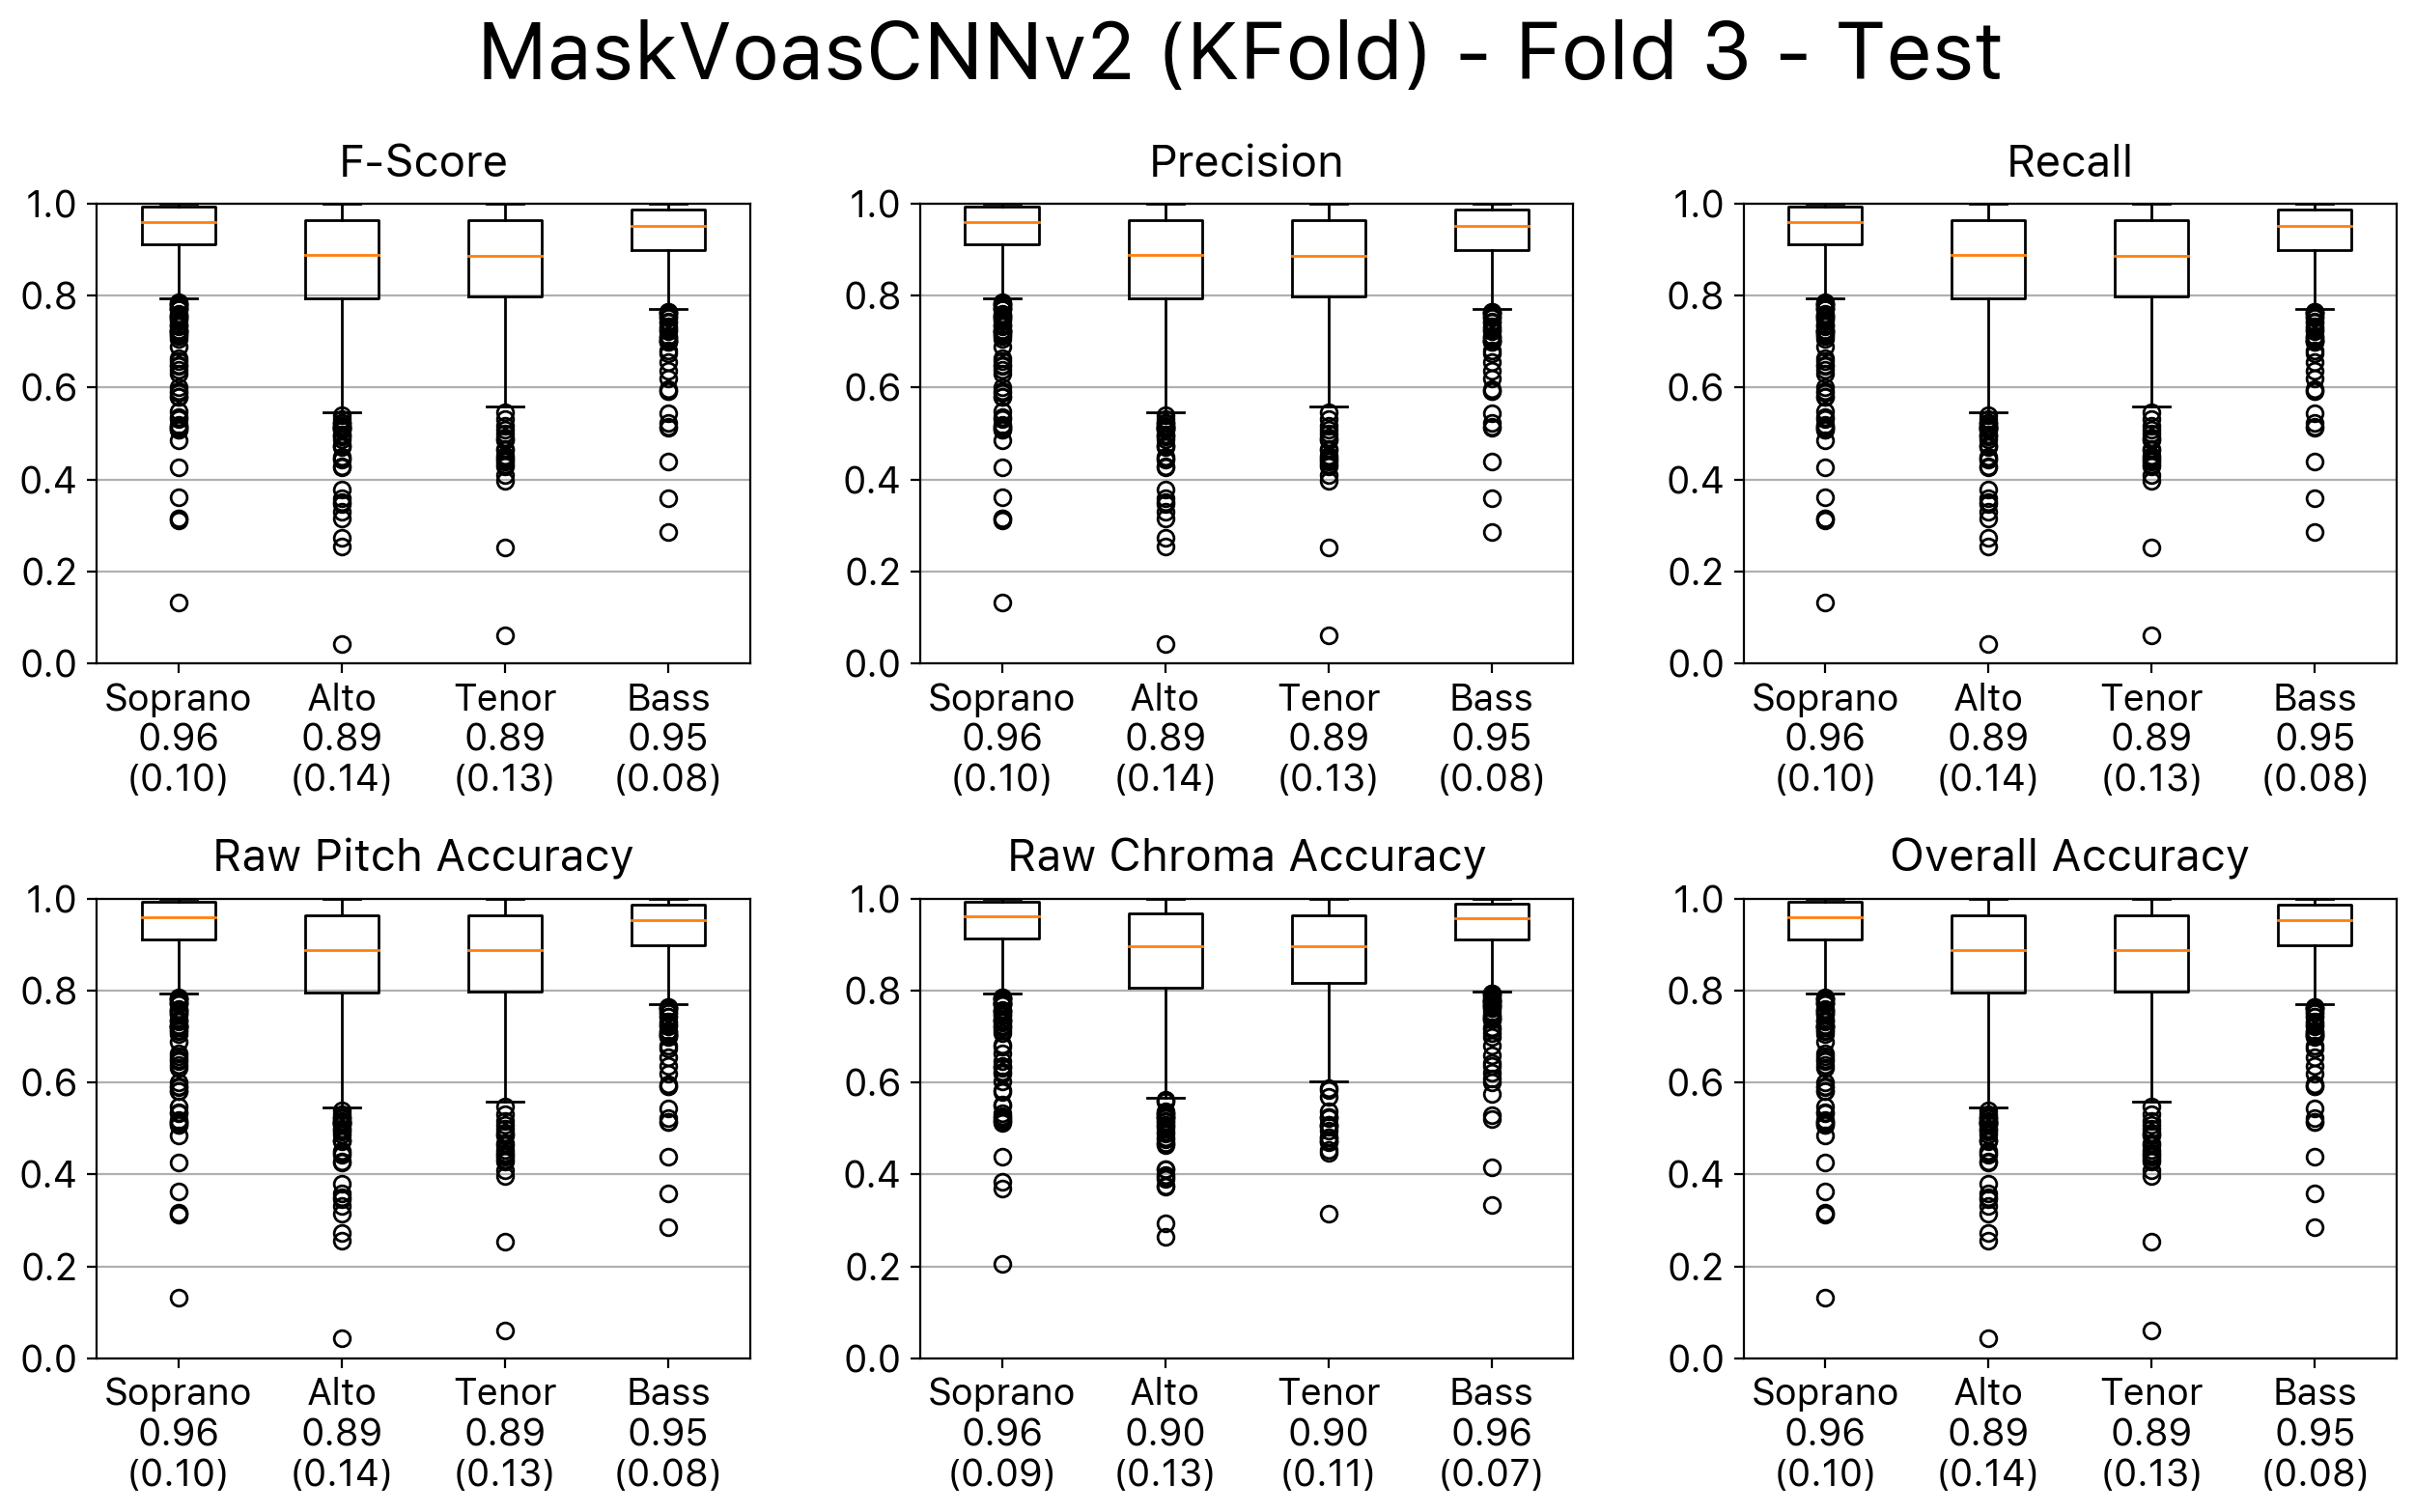

In [7]:
plot_test_metrics(TRAIN, 3)

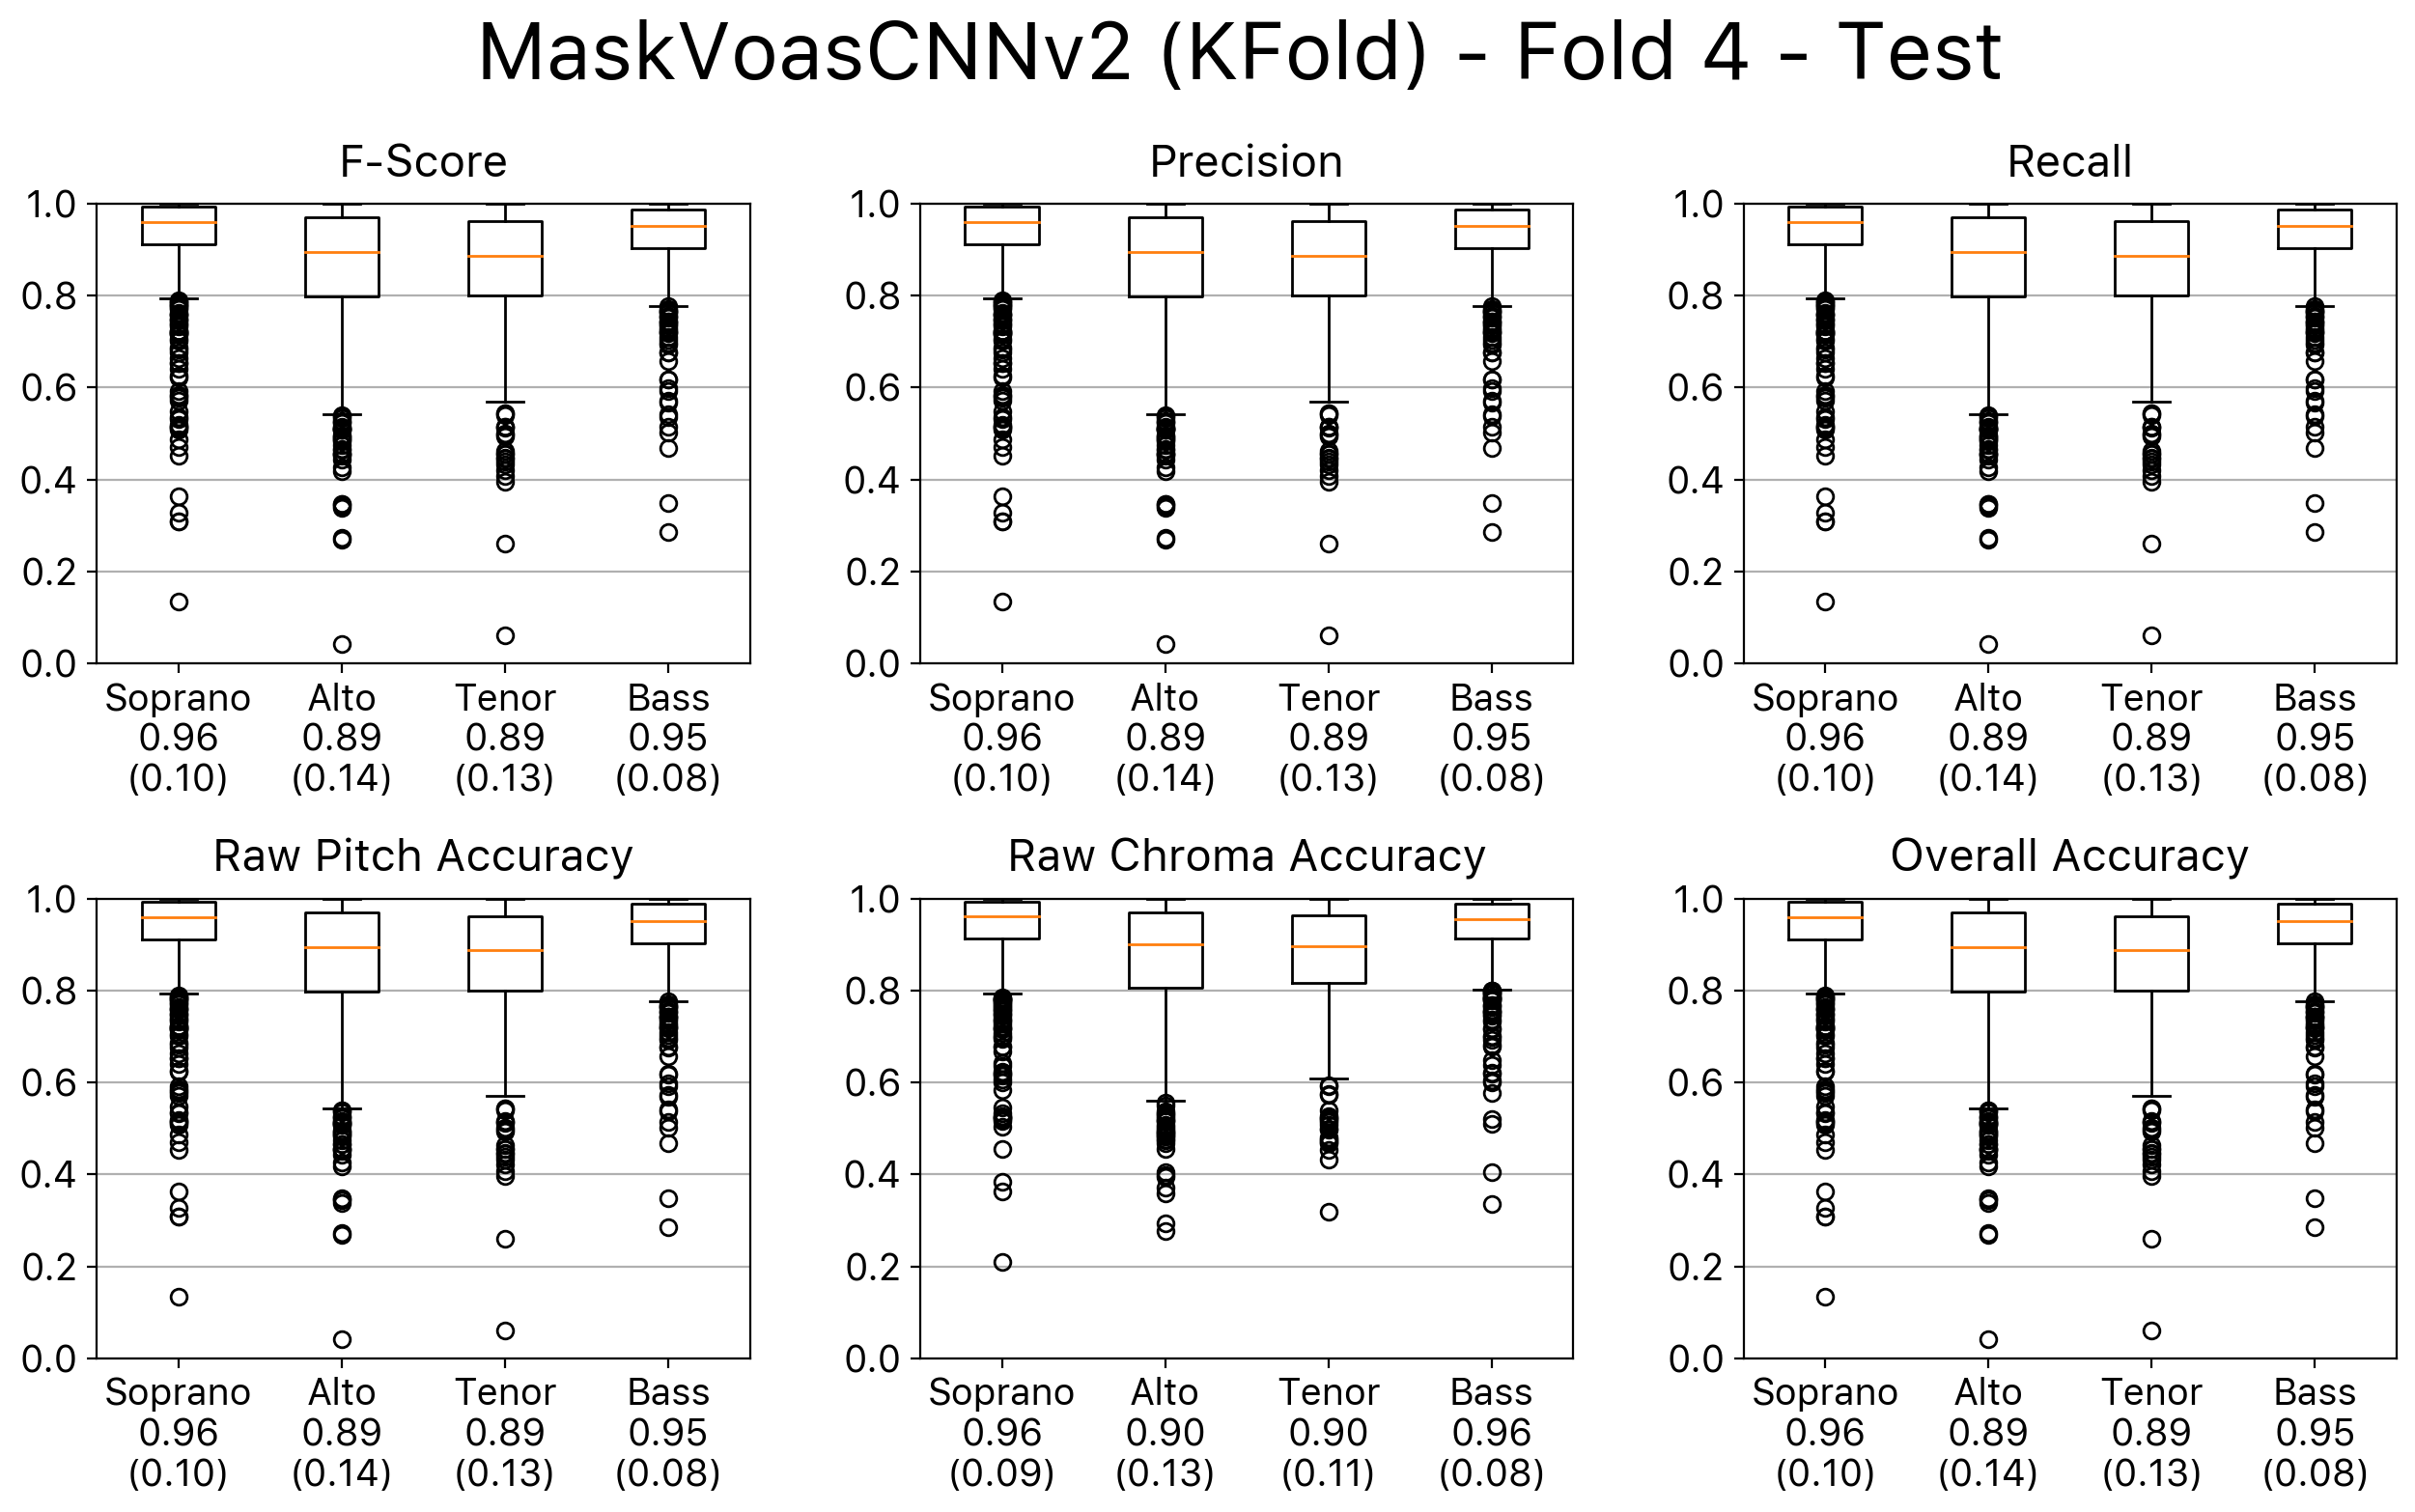

In [8]:
plot_test_metrics(TRAIN, 4)

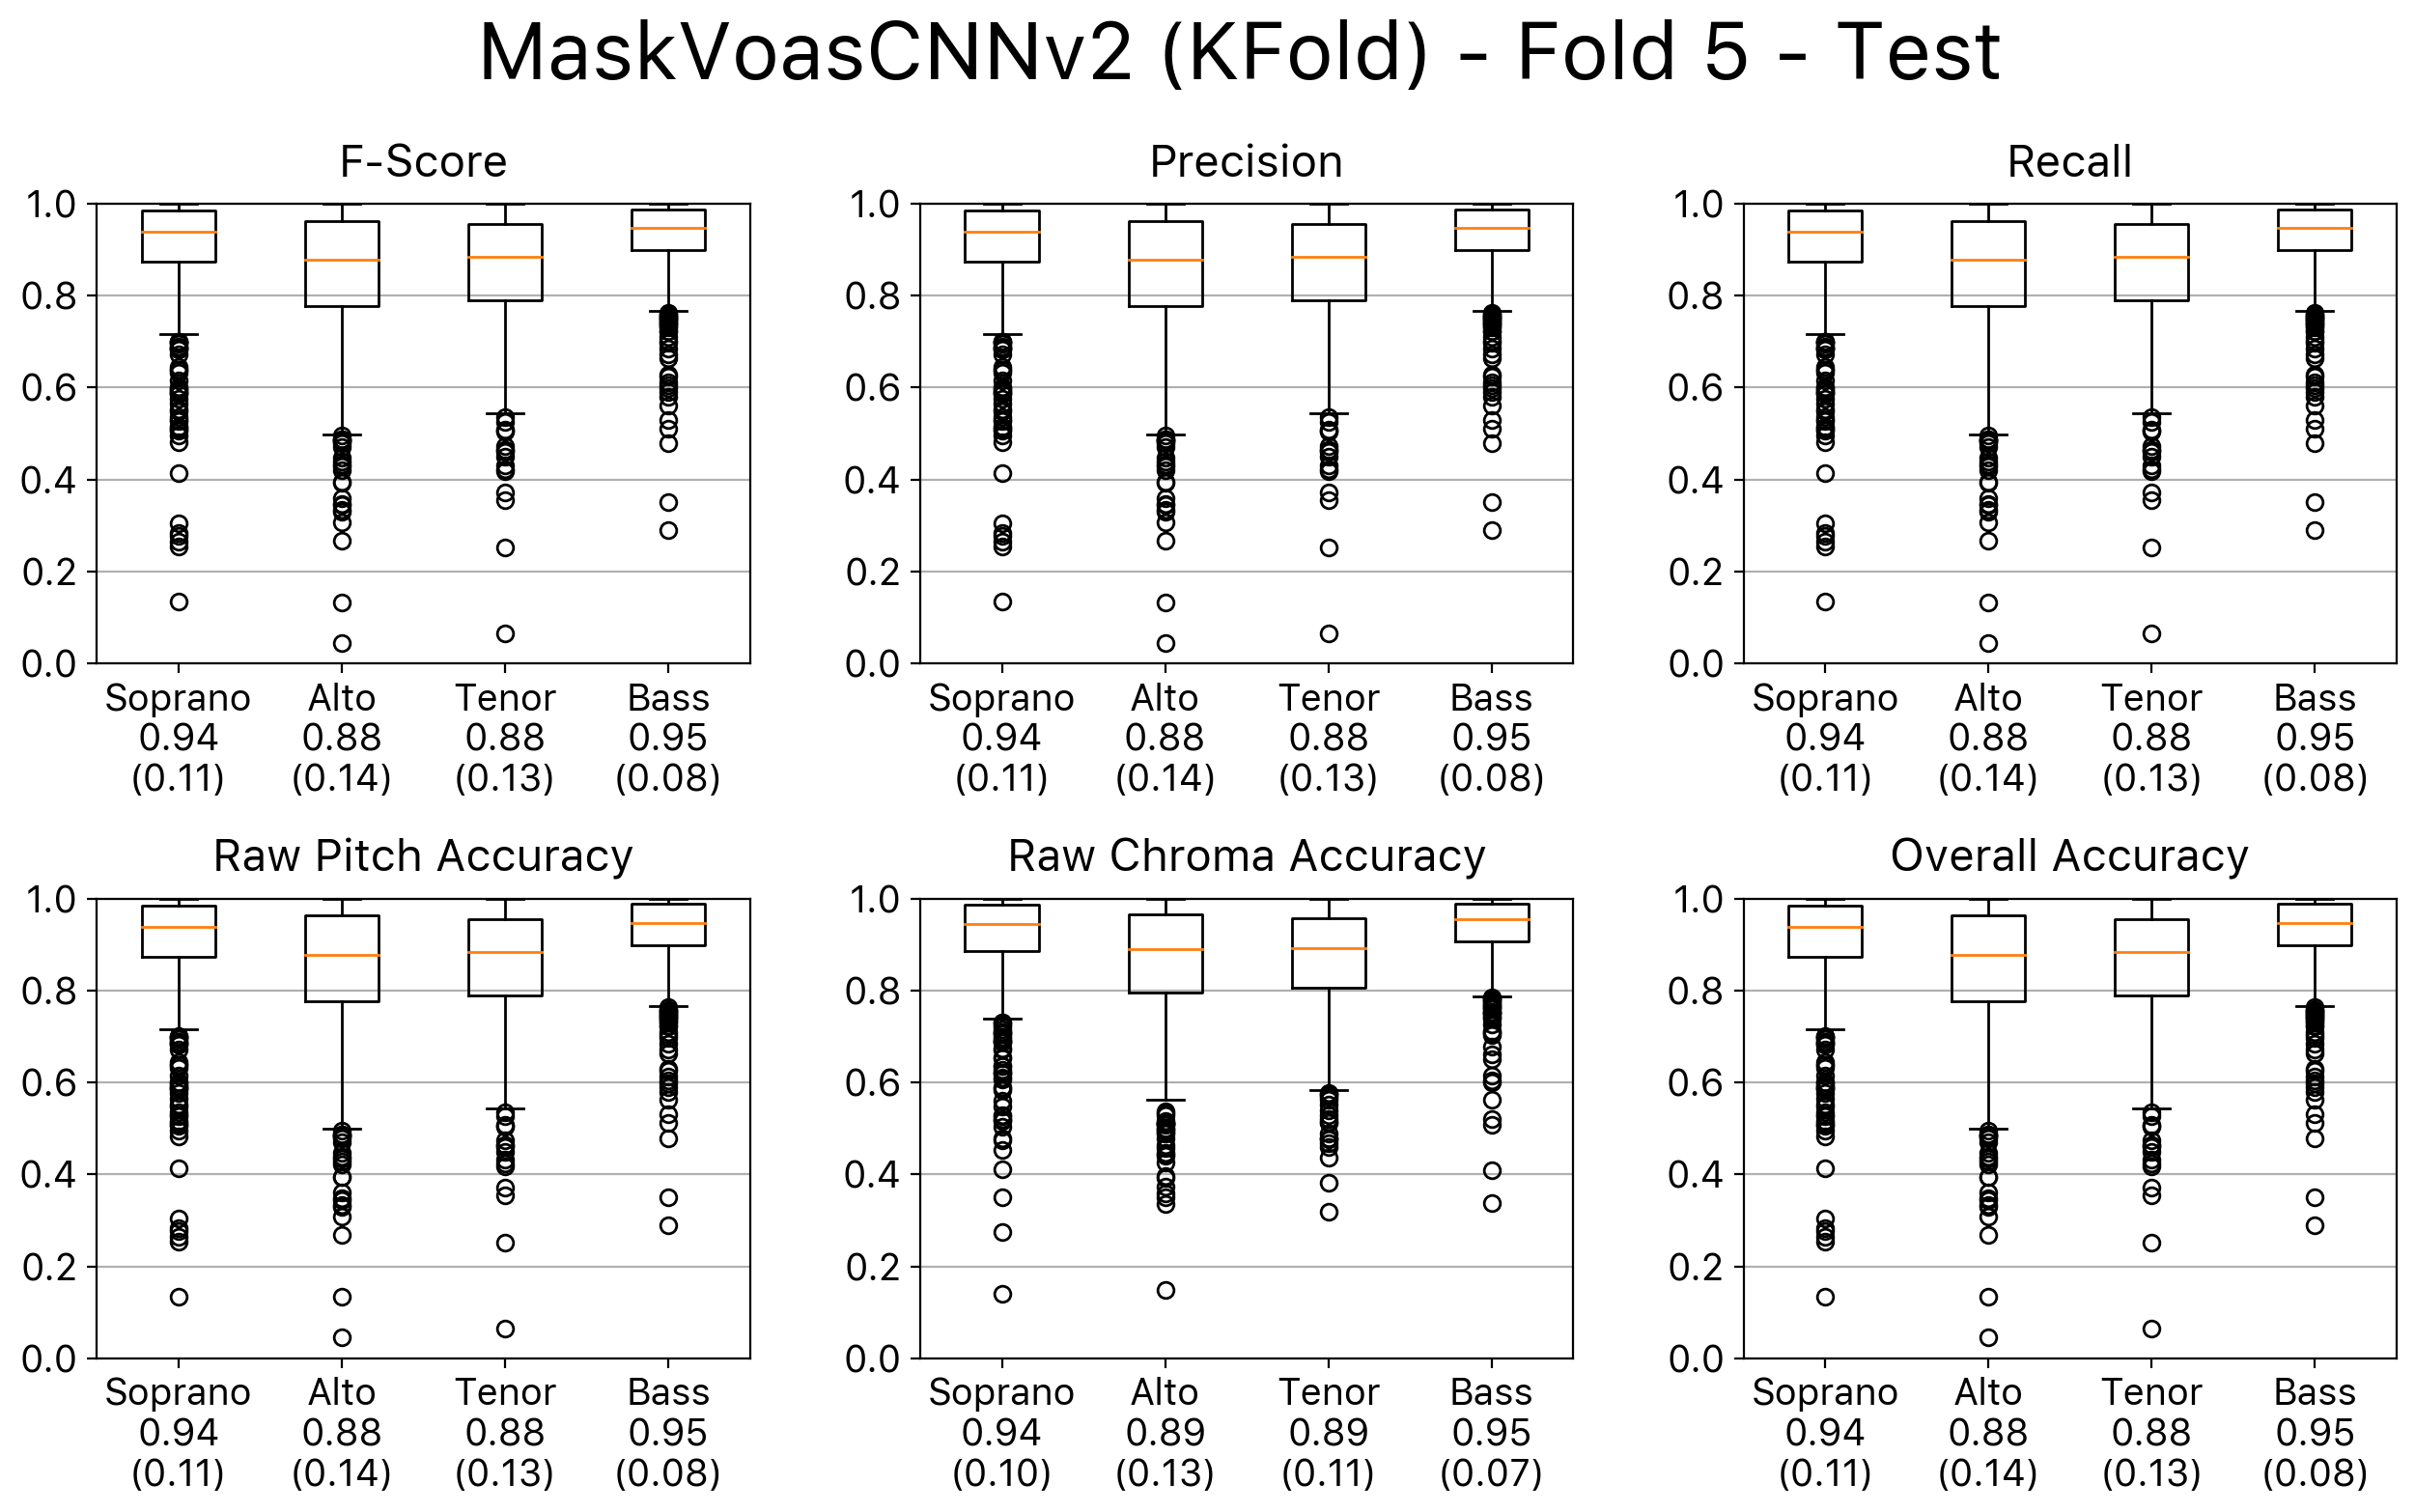

In [9]:
plot_test_metrics(TRAIN, 5)

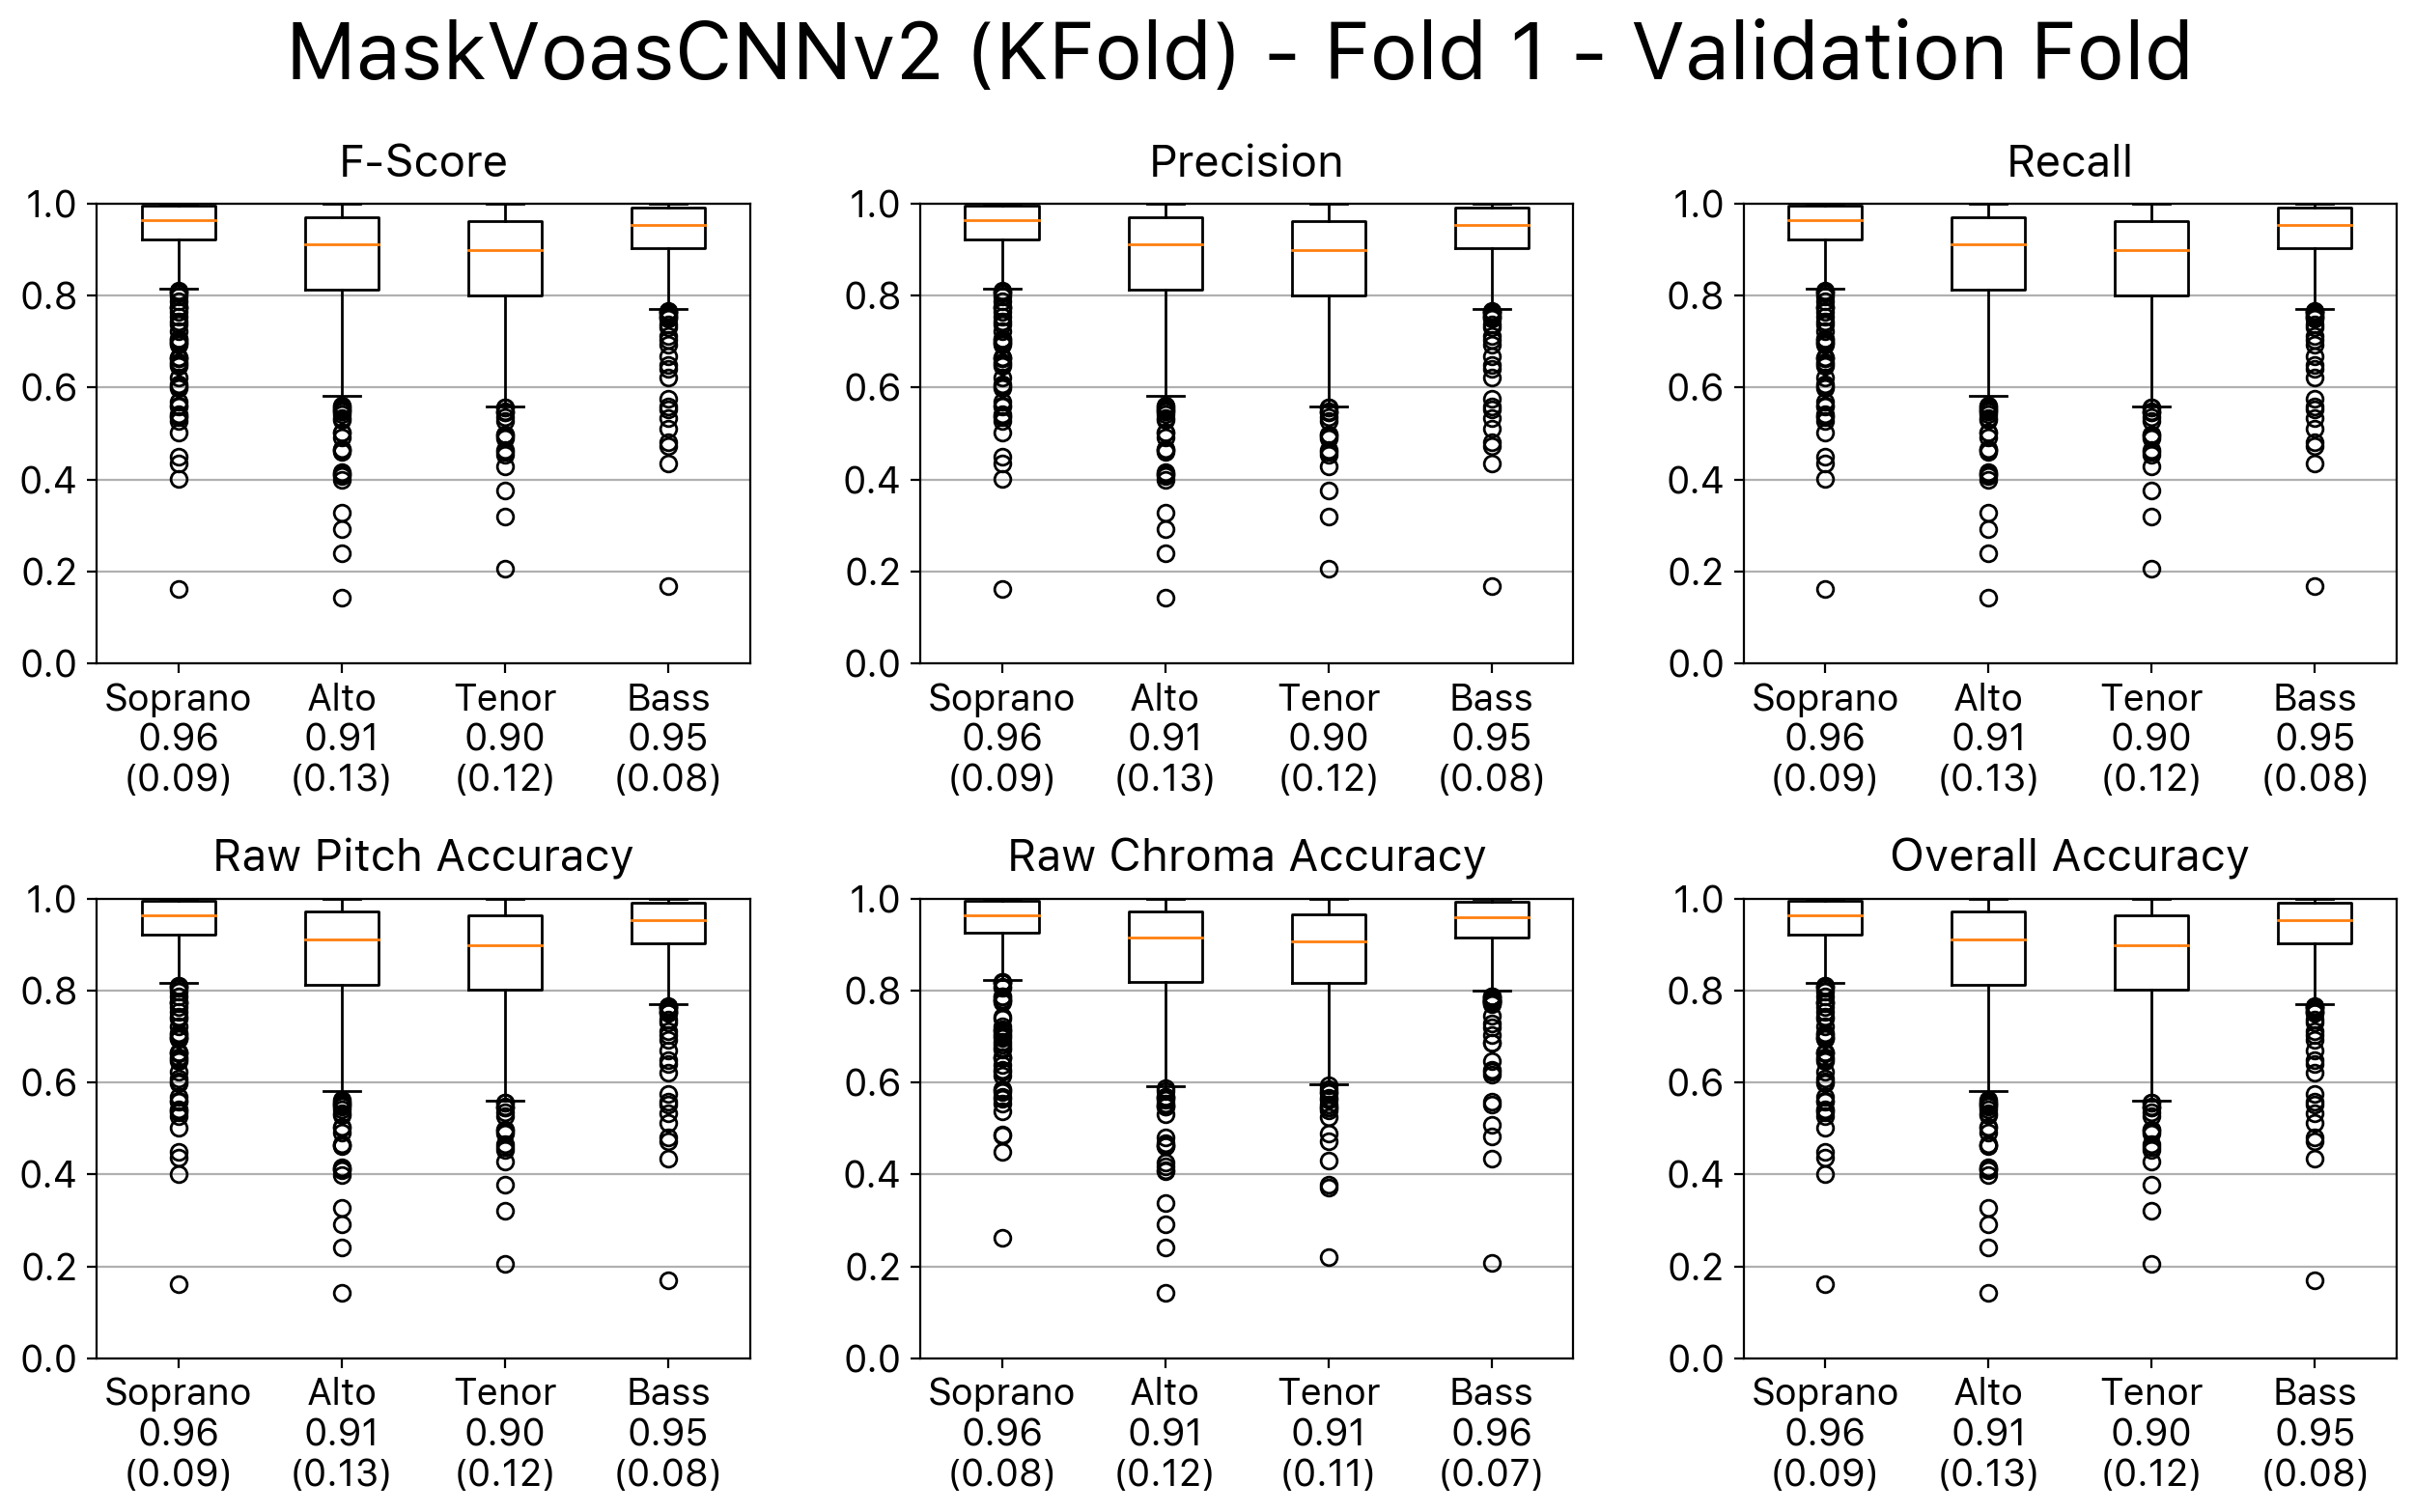

In [10]:
plot_val_metrics(TRAIN, 1)

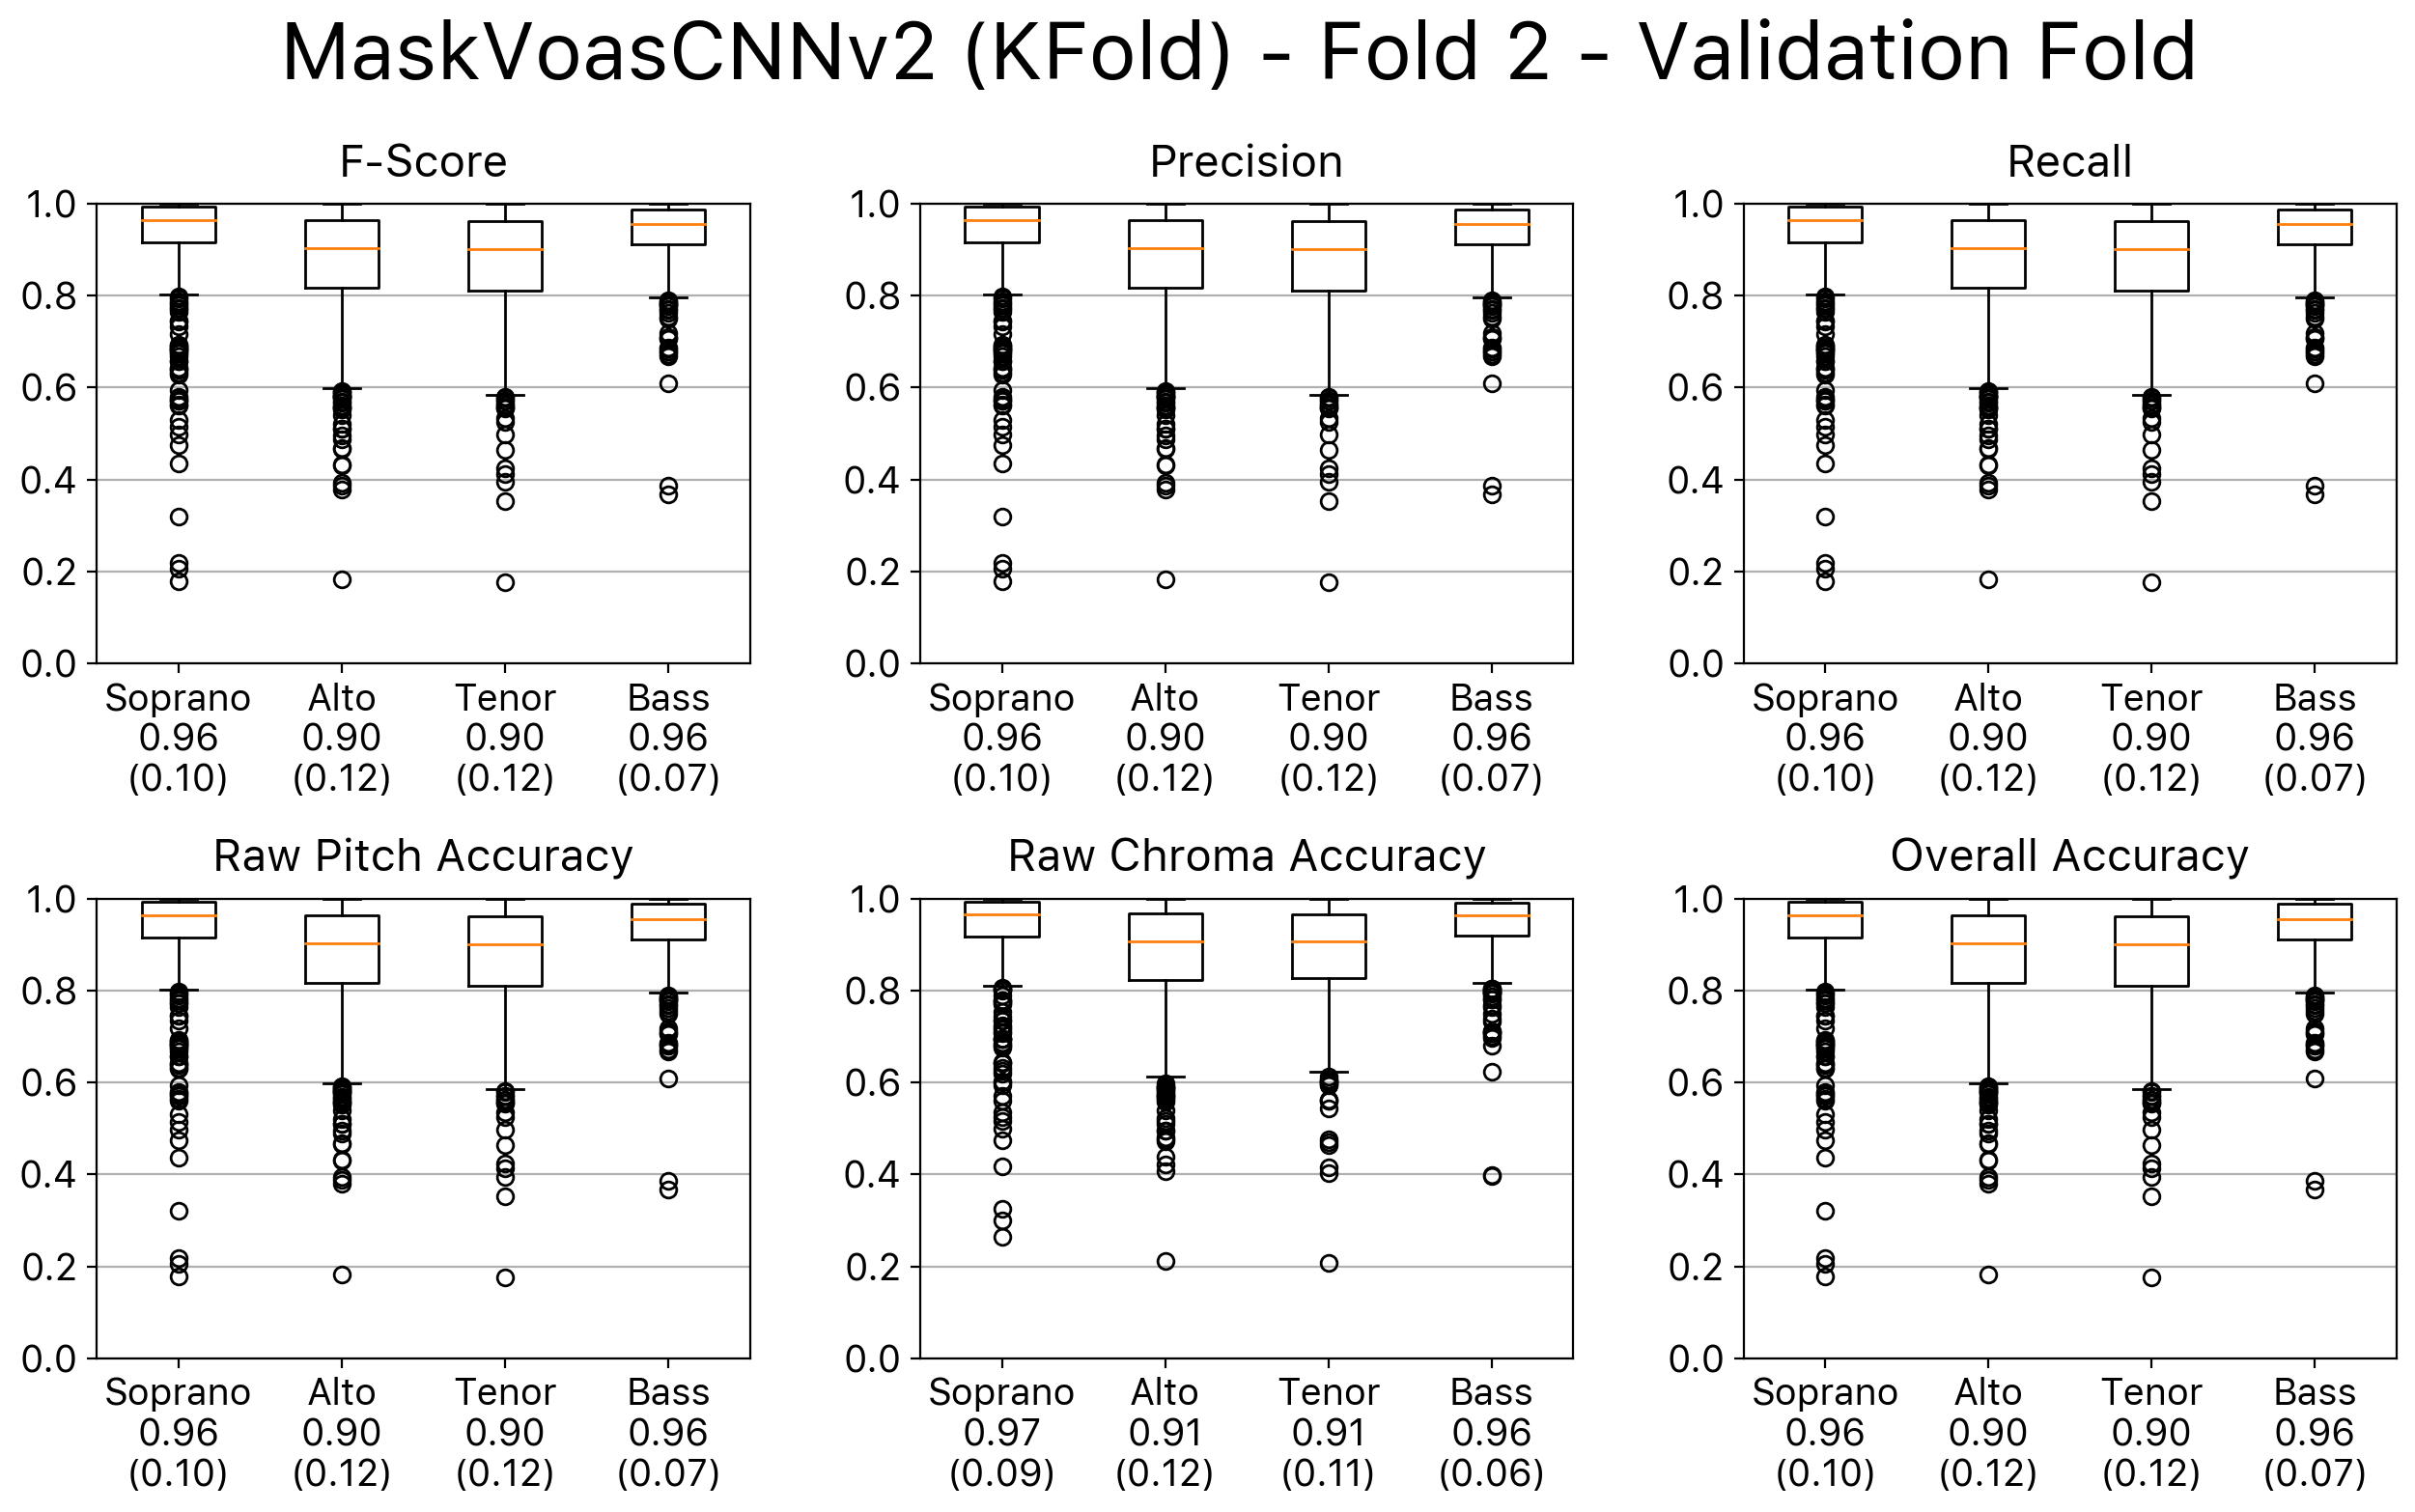

In [11]:
plot_val_metrics(TRAIN, 2)

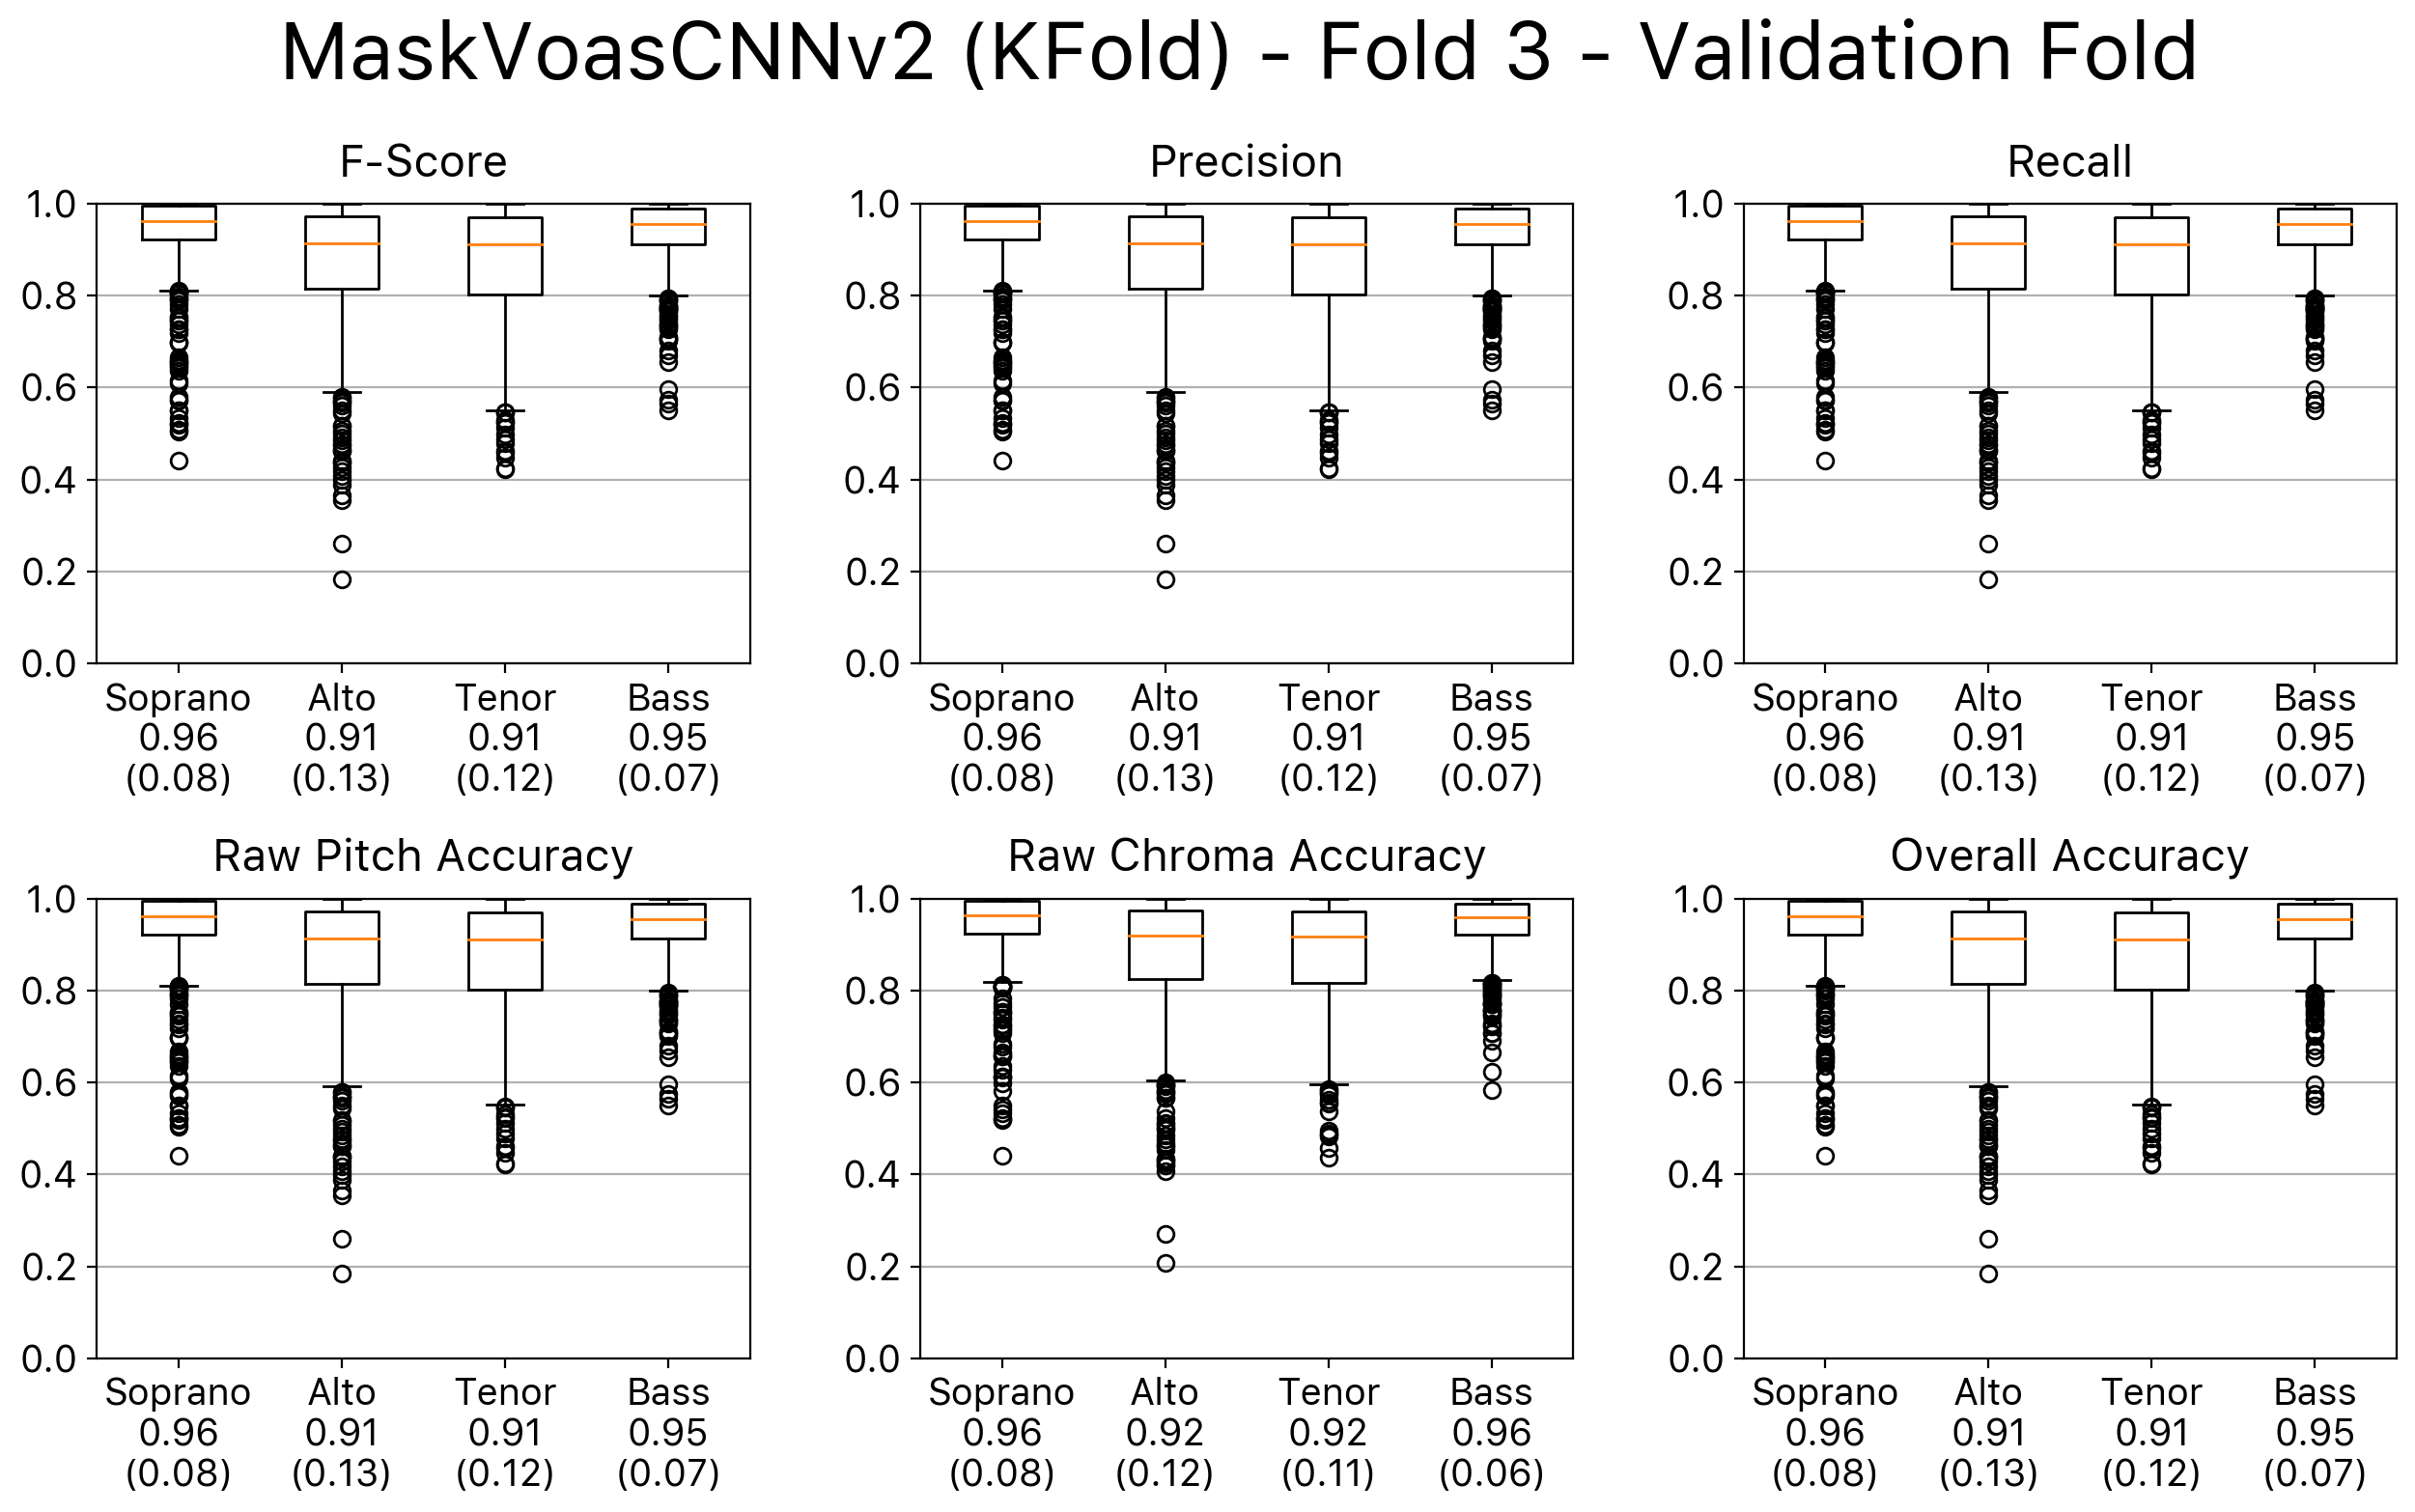

In [12]:
plot_val_metrics(TRAIN, 3)

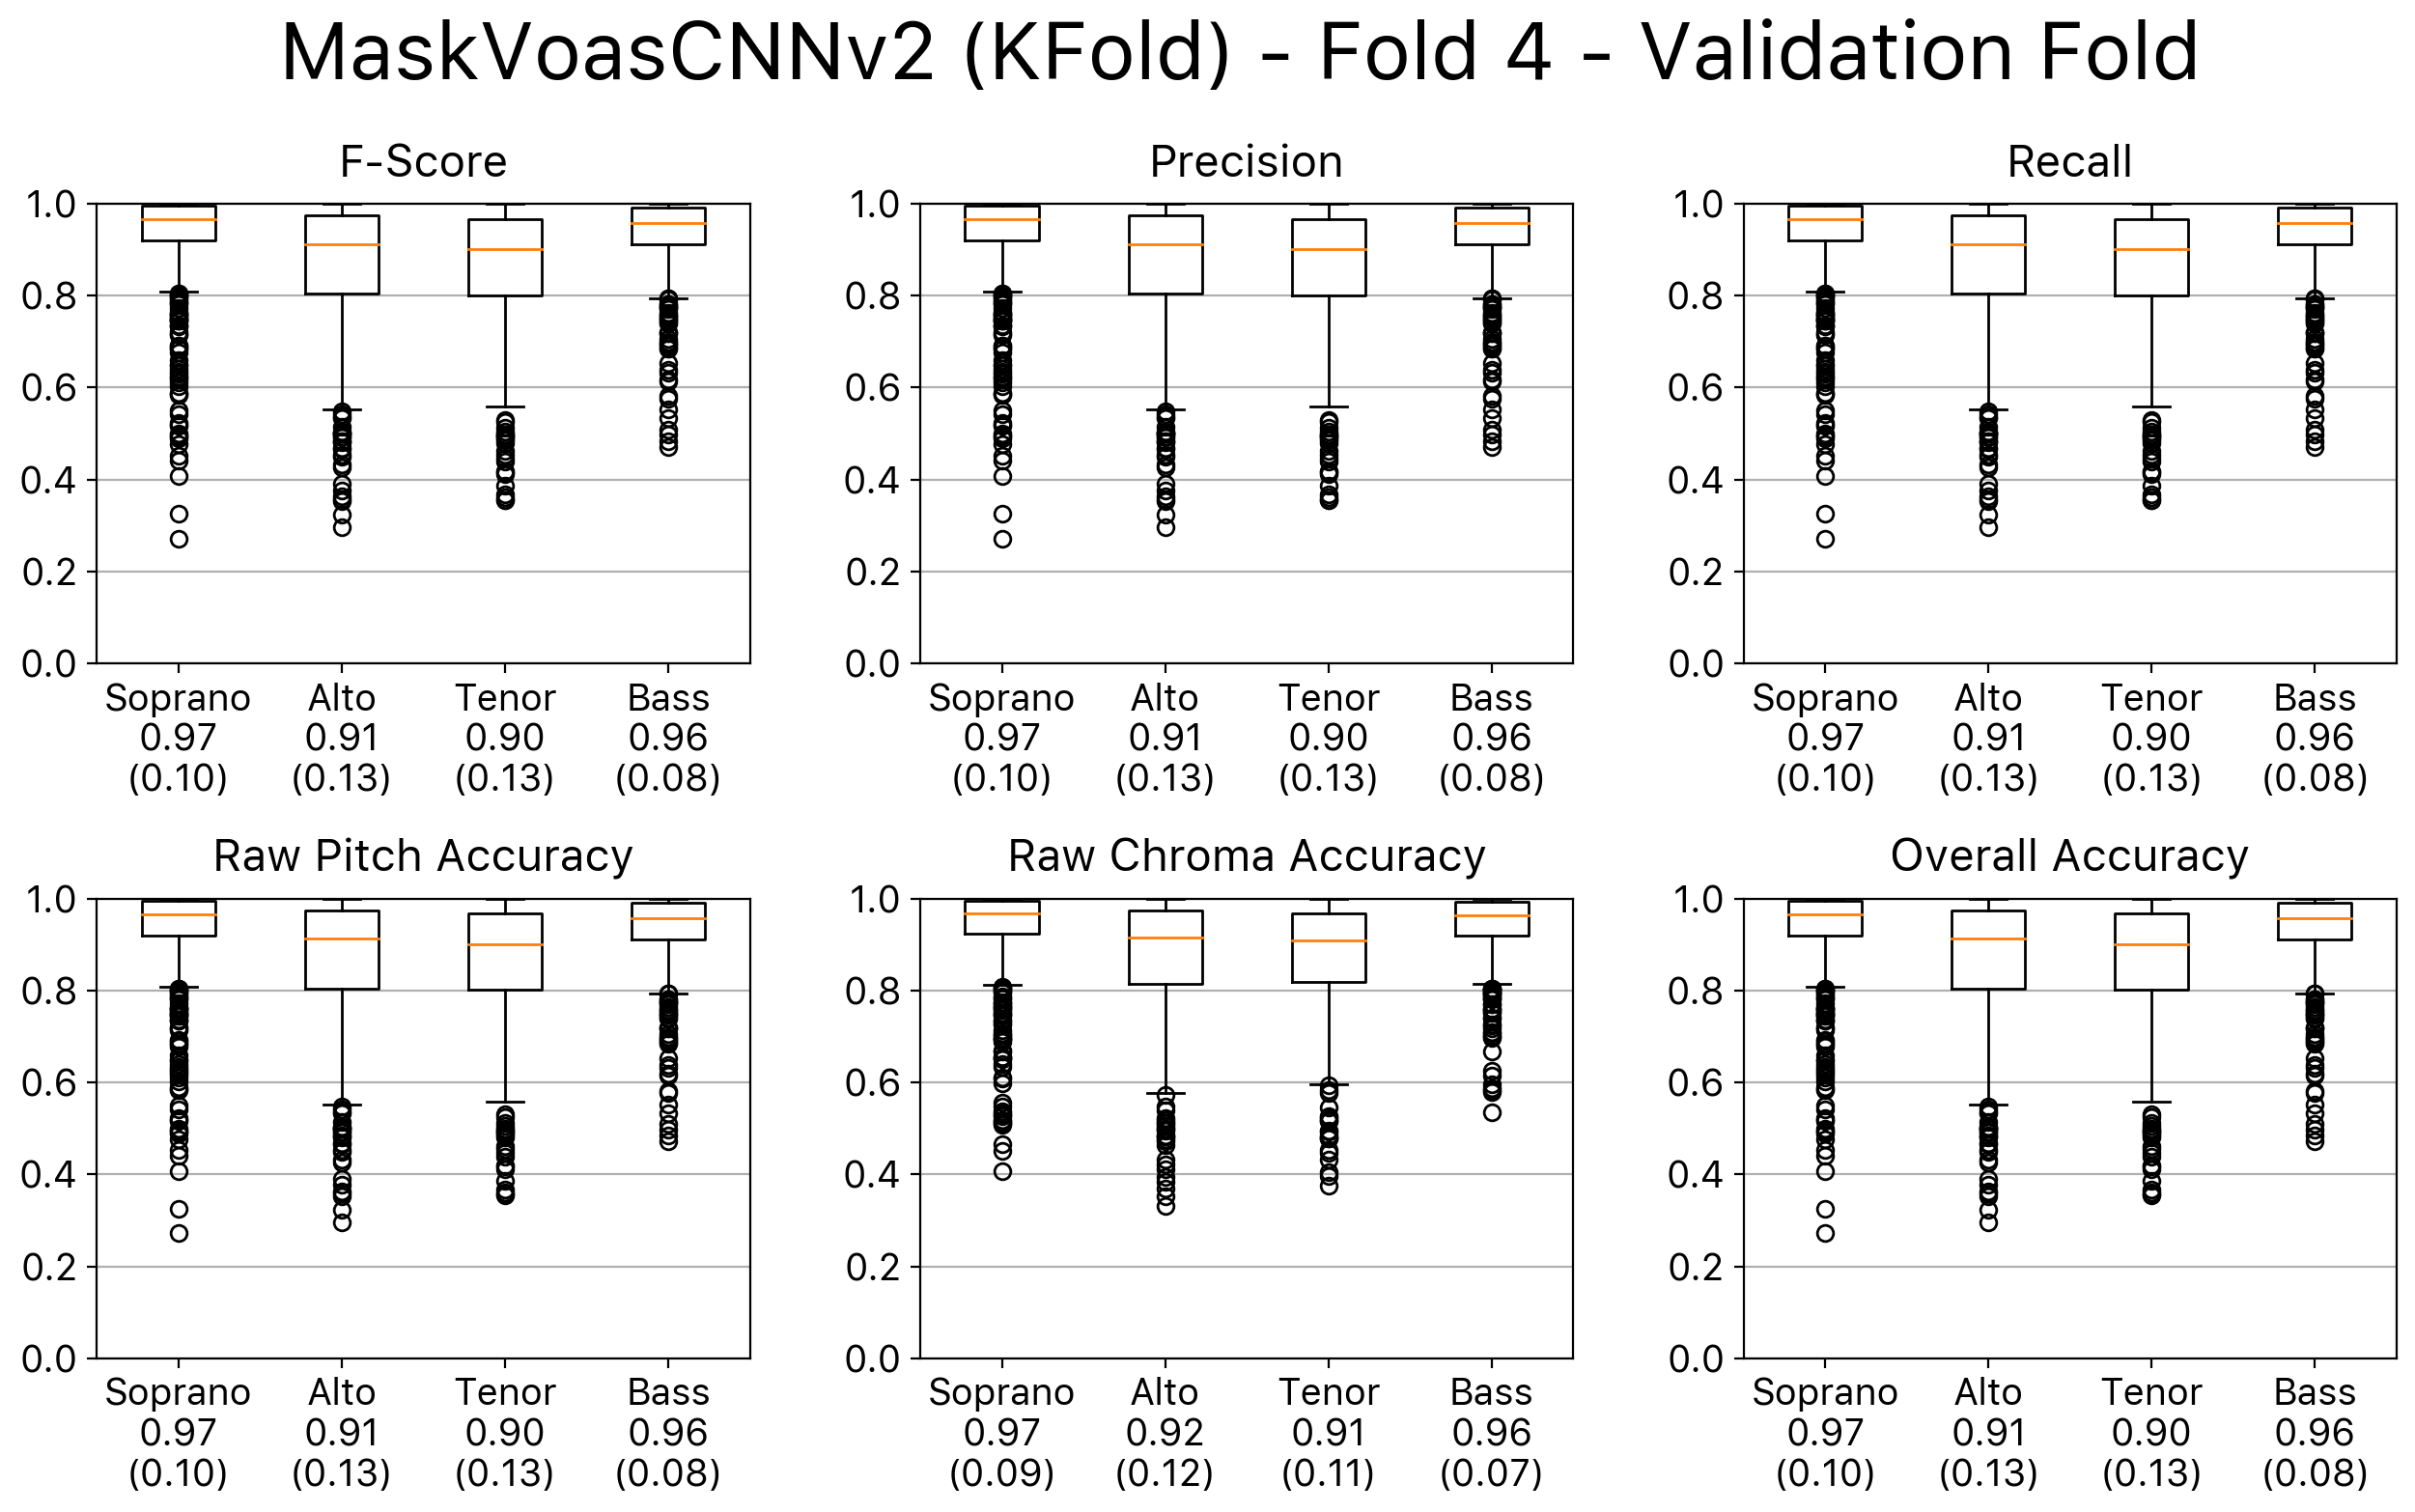

In [13]:
plot_val_metrics(TRAIN, 4)

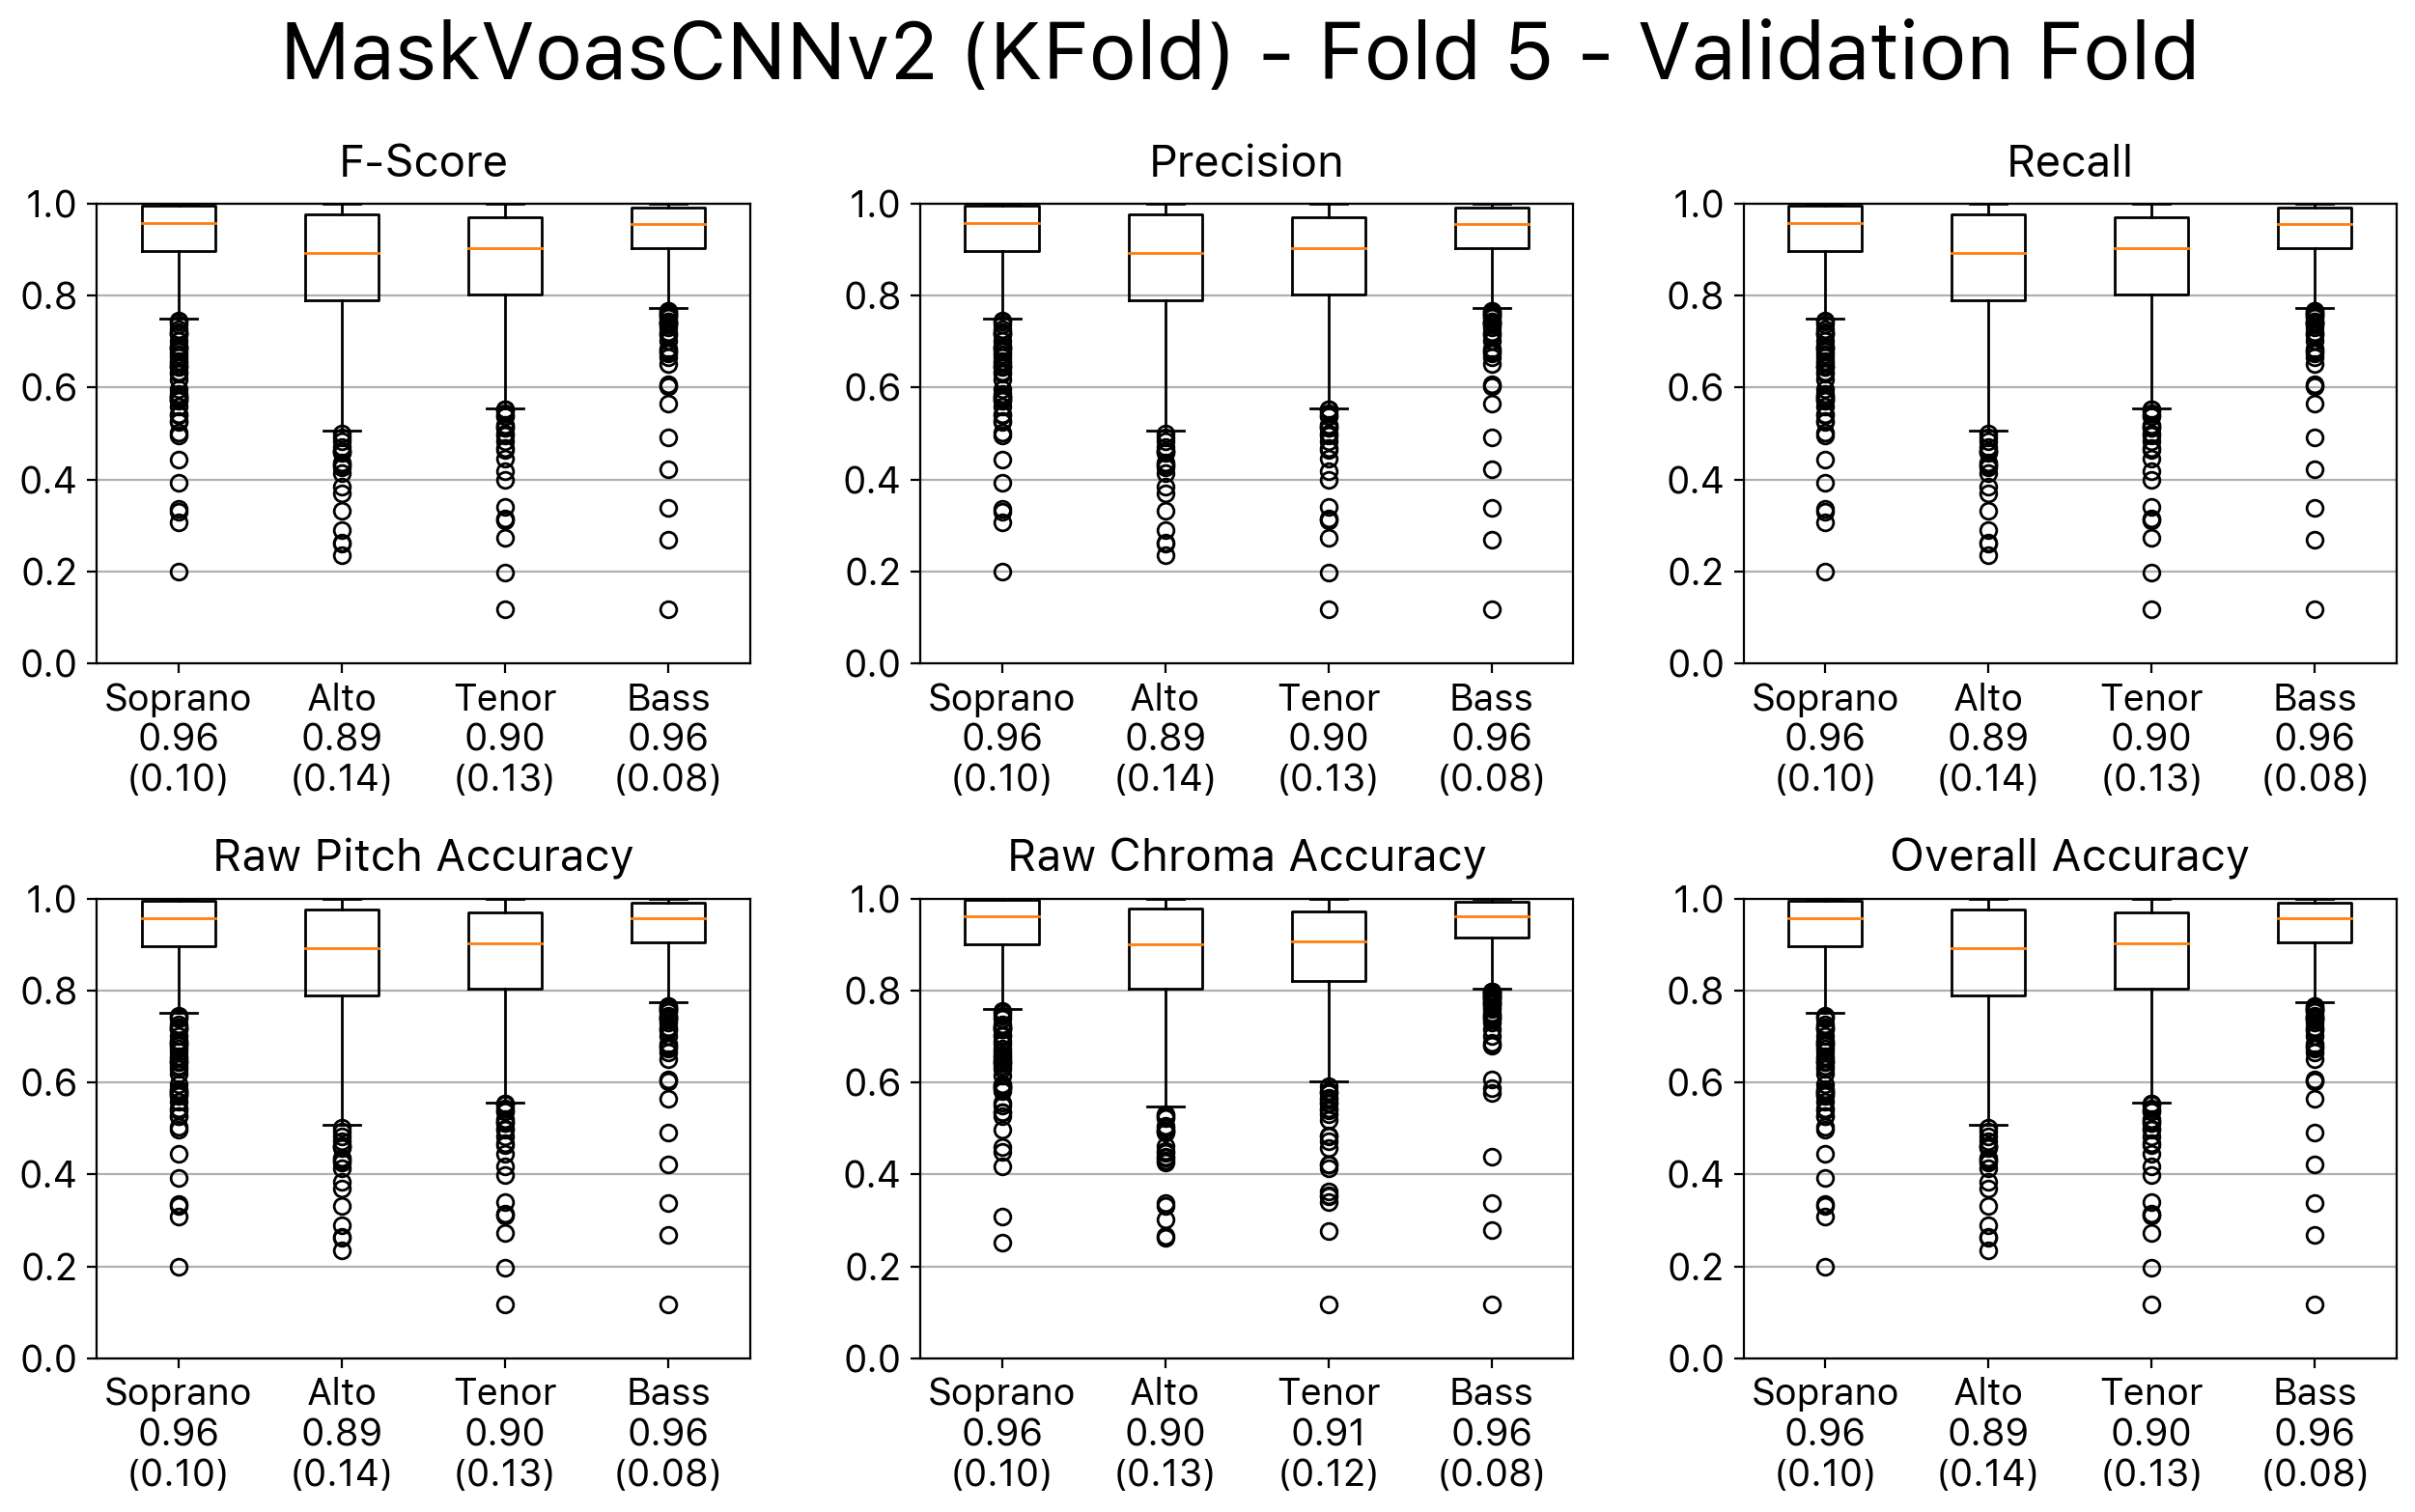

In [14]:
plot_val_metrics(TRAIN, 5)